In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# conda install -c districtdatalabs yellowbrick

In [3]:
import tensorflow as tf

In [4]:
#!pip install nltk
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
#nltk.download('tagsets')

# Read the CSV

In [5]:
data= pd.read_csv("mtsamples 4.csv", index_col=[0])
data

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 234.3+ KB


In [7]:
del data['keywords']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
dtypes: object(4)
memory usage: 195.3+ KB


In [9]:
data.isnull().sum()

description           0
medical_specialty     0
sample_name           0
transcription        33
dtype: int64

In [10]:
data= data.dropna(axis = 0, how ='any') 
data.sample(5)

,description,medical_specialty,sample_name,transcription
3287,"History of diabetes, osteoarthritis, atrial f...",General Medicine,H&P - Gen Med - 2,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
2592,Exam under anesthesia. Removal of intrauteri...,Obstetrics / Gynecology,Intrauterine Clots Removal,"PREOPERATIVE DIAGNOSIS: , Postpartum hemorrhag..."
1909,Template for History and Physical for a newborn.,Pediatrics - Neonatal,Normal Newborn H&P Template,"HISTORY OF PRESENT ILLNESS: , This is a ** wee..."
4934,Flexible Bronchoscopy (pediatric),Cardiovascular / Pulmonary,Bronchoscopy - Pediatric,"FLEXIBLE BRONCHOSCOPY,The flexible bronchoscop..."
3838,"Head injury, anxiety, and hypertensive emerge...",Emergency Room Reports,Head Injury,"CHIEF COMPLAINT:, Head injury.,HISTORY: , Thi..."


In [11]:
data.isnull().sum()

description          0
medical_specialty    0
sample_name          0
transcription        0
dtype: int64

In [12]:
data['transcription']=data['transcription'].astype('str')
data['transcription']

0       SUBJECTIVE:,  This 23-year-old white female pr...
1       PAST MEDICAL HISTORY:, He has difficulty climb...
2       HISTORY OF PRESENT ILLNESS: , I have seen ABC ...
3       2-D M-MODE: , ,1.  Left atrial enlargement wit...
4       1.  The left ventricular cavity size and wall ...
                              ...                        
4994    HISTORY:,  I had the pleasure of meeting and e...
4995    ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...
4996    SUBJECTIVE: , This is a 42-year-old white fema...
4997    CHIEF COMPLAINT: , This 5-year-old male presen...
4998    HISTORY: , A 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [13]:
data.shape

(4966, 4)

In [14]:
#There are 2462670 words in the data set
data.index = range(4966)
data['transcription'].apply(lambda x: len(x.split(' '))).sum()

2462670

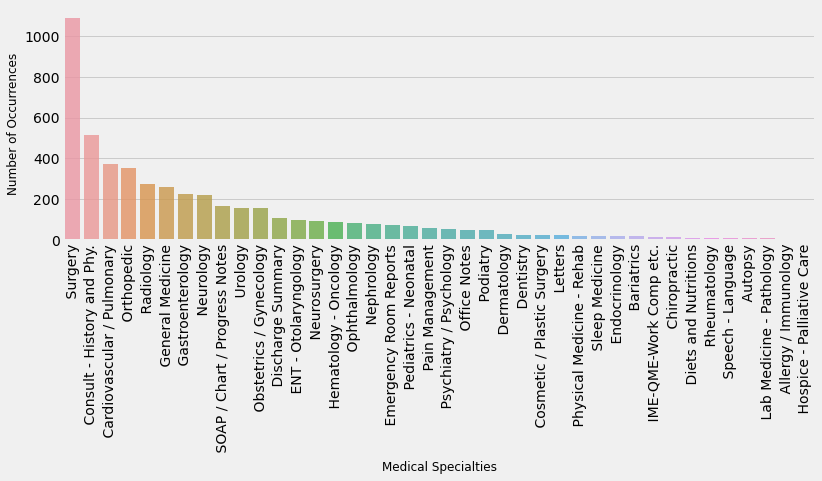

In [15]:
#The classes are imbalanced
import seaborn as sns
cnt_pro = data['medical_specialty'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Medical Specialties', fontsize=12)
plt.xticks(rotation=90)
plt.savefig("./plots/medical_specialty.png")

In [16]:
data['transcription'] = data['transcription'].str.lower()
data['transcription']

0       subjective:,  this 23-year-old white female pr...
1       past medical history:, he has difficulty climb...
2       history of present illness: , i have seen abc ...
3       2-d m-mode: , ,1.  left atrial enlargement wit...
4       1.  the left ventricular cavity size and wall ...
                              ...                        
4961    history:,  i had the pleasure of meeting and e...
4962    admitting diagnosis: , kawasaki disease.,disch...
4963    subjective: , this is a 42-year-old white fema...
4964    chief complaint: , this 5-year-old male presen...
4965    history: , a 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [17]:
#Let’s have a look a few examples 
def clinical_note(index):
    example = data[data.index == index][['transcription', 'medical_specialty']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Medical Specialty:', example[1])
clinical_note(15)

history of present illness: ,i have seen abc today for her preoperative visit for weight management.  i have explained to her the need for optifast for weight loss prior to these procedures to make it safer because of the large size of her liver.  she understands this.,impression/plan:, we are going to put her on two weeks of optifast at around 900 calories.  i have also explained the risks and potential complications of laparoscopic cholecystectomy to her in detail including bleeding, infection, deep venous thrombosis, pulmonary embolism, injury to the small intestine, stomach, liver, leak from the cystic duct, common bile duct, and possible need for ercp and further surgery.  this surgery is going to be planned for october 6.  this is for cholelithiasis prior to her lap-banding procedure.,i have also reviewed with her the risks and potential complications of laparoscopic gastric banding including bleeding, infection, deep venous thrombosis, pulmonary embolism, slippage of the band, e

In [18]:
clinical_note(37)

preoperative diagnosis:,  benign prostatic hyperplasia.,postoperative diagnosis:,  benign prostatic hyperplasia.,operation performed: , transurethral electrosurgical resection of the prostate.,anesthesia: , general.,complications:,  none.,indications for the surgery:,  this is a 77-year-old man with severe benign prostatic hyperplasia.  he has had problem with urinary retention and bladder stones in the past.  he will need to have transurethral resection of prostate to alleviate the above-mentioned problems.  potential complications include, but are not limited to:,1.  infection.,2.  bleeding.,3.  incontinence.,4.  impotence.,5.  formation of urethral strictures.,procedure in detail: , the patient was identified, after which he was taken into the operating room.  general lma anesthesia was then administered.  the patient was given prophylactic antibiotic in the preoperative holding area.  the patient was then positioned, prepped and draped.  cystoscopy was then performed by using a #26

In [19]:
clinical_note(98)

preoperative diagnosis: , right inguinal hernia.,postoperative diagnosis: , direct right inguinal hernia.,title of procedure: , marlex repair of right inguinal hernia.,anesthesia:,  spinal.,procedure in detail:,  the patient was taken to the operative suite, placed on the table in the supine position, and given a spinal anesthetic.  the right inguinal region was shaved and prepped and draped in a routine sterile fashion.  the patient received 1 gm of ancef iv push.,transverse incision was made in the intraabdominal crease and carried through skin and subcutaneous tissue.  the external oblique fascia was exposed and incised down to and through the external inguinal ring.  the spermatic cord and hernia sac were dissected bluntly off the undersurface of the external oblique fascia exposing the attenuated floor of the inguinal canal.  the cord was surrounded with a penrose drain.  the hernia sac was separated from the cord structures.  the floor of the inguinal canal, which consisted of at

In [20]:
clinical_note(1007)

preoperative diagnosis: , right distal both-bone forearm fracture.,postoperative diagnosis: , right distal both-bone forearm fracture.,indications:,  mr. abc is a 10-year-old boy who suffered a fall resulting in a right distal both-bone forearm fracture.  upon evaluation by orthopedic surgery team in the emergency department, it was determined that a closed reduction under conscious sedation and application of a splint was warranted.  this was discussed with the parents who expressed verbal and written consent.,procedure:,  conscious sedation was achieved via propofol via the emergency department staff.  afterwards, traction with re-creation of the injury pattern was utilized to achieve reduction of the patient's fracture.  this was confirmed with image intensifier.  subsequently, the patient was placed into a splint.  the patient was aroused from conscious sedation and at this time it was noted that he had full sensation throughout radial, median, and ulnar nerve distributions and pos

In [21]:
#getting rid of targeted charachters in the trascription
chars = ['#',':,',': ,',';','$','!','?','*','``','1. ', '2. ', '3. ', '4. ', '5. ','6. ','7. ','8. ','9. ','10. ']
for c in chars:
    data['transcription'] = data['transcription'].str.replace(c,"")

data.sample(5)

# chars = "\`*_{}[]()>#+-.,!$:;%'&/?"

,description,medical_specialty,sample_name,transcription
2846,Headache. Right frontal lobe glioma.,Neurology,Glioma - 2,"cc headache,hxy/o rhf presented to her local p..."
771,Cellulitis with associated abscess and foreig...,Surgery,Foreign Body Removal - Foot - 1,preoperative diagnoses cellulitis with associa...
3408,A 2-month-old female with 1-week history of c...,General Medicine,Congestion & Fever - 2-month-old,chief complaint a 2-month-old female with 1-w...
1628,Patient with a past medical history of a left...,Radiology,EMG/Nerve Conduction Study - 6,history the patient is a 46-year-old right-ha...
4905,Plastic piece foreign body in the right main...,Cardiovascular / Pulmonary,Bronchoscopy & Foreign Body Removal,preoperative diagnosis foreign body in airway....


In [22]:
#getting rid of targeted charachters in the trascription
chars = [",", ".", "[", "]", ' / ', ":", "``", ")", "(", "1", "2", "5", "%", "3", "4", "4-0", "3-0", "6", "''", "0", "2-0", "8", "7", "&", "5-0", "9", "0.5", "1.5", "500", "50", "100", "6-0", "15", "2.5", "14-15", "60", "'", "300", "14", "________", "7-0", "90", "__________", "3.5", "1:100,000", "70", "0.", "80", "1:50,000", "03/08/200 ", "03/09/2007", "25605", "7.314", "33.0", "855.", "08/22/03", "10/500", "125.", "144/6", '__', '___', '____', '_____', '______', '_______']
for c in chars:
    data['transcription'] = data['transcription'].str.replace(c," ")

data.sample(5)


,description,medical_specialty,sample_name,transcription
1966,Knee injection,Pain Management,Knee Injection,the patient was told that the injection may ca...
69,"The patient is a 16-month-old boy, who had a ...",Urology,Penile Cellulitis,chief complaint penile cellulitis status po...
748,"Removal of painful hardware, first left metat...",Surgery,Hardware Removal - Metatarsal,title of operation removal of painful hardware...
4514,"Left buttock abscess, status post incision an...",Consult - History and Phy.,Buttock Abscess,chief complaint buttock abscess history of pr...
1929,"1+ year, black female for initial evaluation ...",Pediatrics - Neonatal,Atopic Eczema,subjective this year black female new patie...


In [23]:
# Tokenizing 
from nltk.tokenize import word_tokenize

data['tokenized_sents'] = data['transcription'].apply(nltk.word_tokenize)
data.sample(5)

,description,medical_specialty,sample_name,transcription,tokenized_sents
1447,Followup of moderate-to-severe sleep apnea. ...,Sleep Medicine,Sleep Apnea,reason for visit mr abc is a -year-old man ...,"[reason, for, visit, mr, abc, is, a, -year-old..."
3996,"Removal of cystic lesion, removal of teeth, m...",Dentistry,Teeth Extraction,preoperative diagnoses basal cell nevus syndr...,"[preoperative, diagnoses, basal, cell, nevus, ..."
3610,Colonoscopy to screen for colon cancer,Gastroenterology,Colonoscopy - 6,indications this is a -year-old female who i...,"[indications, this, is, a, -year-old, female, ..."
497,Left facial cellulitis and possible odontogen...,Surgery,Odontogenic Abscess I&D,preoperative diagnoses left facial cellulitis ...,"[preoperative, diagnoses, left, facial, cellul..."
3545,The patient was brought to the OR with the kn...,Gastroenterology,Endovascular Abdominal Aortic Aneurysm Repair,preoperative diagnosis abdominal aortic aneury...,"[preoperative, diagnosis, abdominal, aortic, a..."


In [24]:
data["tokenized_sents"][0][0]

'subjective'

In [25]:
#Gettin the POS tags 
from nltk import pos_tag

In [26]:
nltk.tag.pos_tag(data["tokenized_sents"][0])

[('subjective', 'NN'),
 ('this', 'DT'),
 ('-year-old', 'JJ'),
 ('white', 'JJ'),
 ('female', 'NN'),
 ('presents', 'NNS'),
 ('with', 'IN'),
 ('complaint', 'NN'),
 ('of', 'IN'),
 ('allergies', 'NNS'),
 ('she', 'PRP'),
 ('used', 'VBD'),
 ('to', 'TO'),
 ('have', 'VB'),
 ('allergies', 'NNS'),
 ('when', 'WRB'),
 ('she', 'PRP'),
 ('lived', 'VBD'),
 ('in', 'IN'),
 ('seattle', 'NN'),
 ('but', 'CC'),
 ('she', 'PRP'),
 ('thinks', 'VBZ'),
 ('they', 'PRP'),
 ('are', 'VBP'),
 ('worse', 'JJR'),
 ('here', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('past', 'JJ'),
 ('she', 'PRP'),
 ('has', 'VBZ'),
 ('tried', 'VBN'),
 ('claritin', 'NN'),
 ('and', 'CC'),
 ('zyrtec', 'NN'),
 ('both', 'DT'),
 ('worked', 'VBD'),
 ('for', 'IN'),
 ('short', 'JJ'),
 ('time', 'NN'),
 ('but', 'CC'),
 ('then', 'RB'),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('lose', 'VB'),
 ('effectiveness', 'NN'),
 ('she', 'PRP'),
 ('has', 'VBZ'),
 ('used', 'VBN'),
 ('allegra', 'NN'),
 ('also', 'RB'),
 ('she', 'PRP'),
 ('used', 'VBD'),
 ('that', 'IN'),
 (

In [27]:
data['POSTags'] = data['tokenized_sents'].apply(pos_tag)

In [28]:
data['POSTags'].head()

0    [(subjective, NN), (this, DT), (-year-old, JJ)...
1    [(past, JJ), (medical, JJ), (history, NN), (he...
2    [(history, NN), (of, IN), (present, JJ), (illn...
3    [(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...
4    [(the, DT), (left, NN), (ventricular, JJ), (ca...
Name: POSTags, dtype: object

In [29]:
postags_plot =[data['POSTags'].to_list()]
type(postags_plot)

list

<AxesSubplot:title={'center':'PosTag plot for 2311510-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

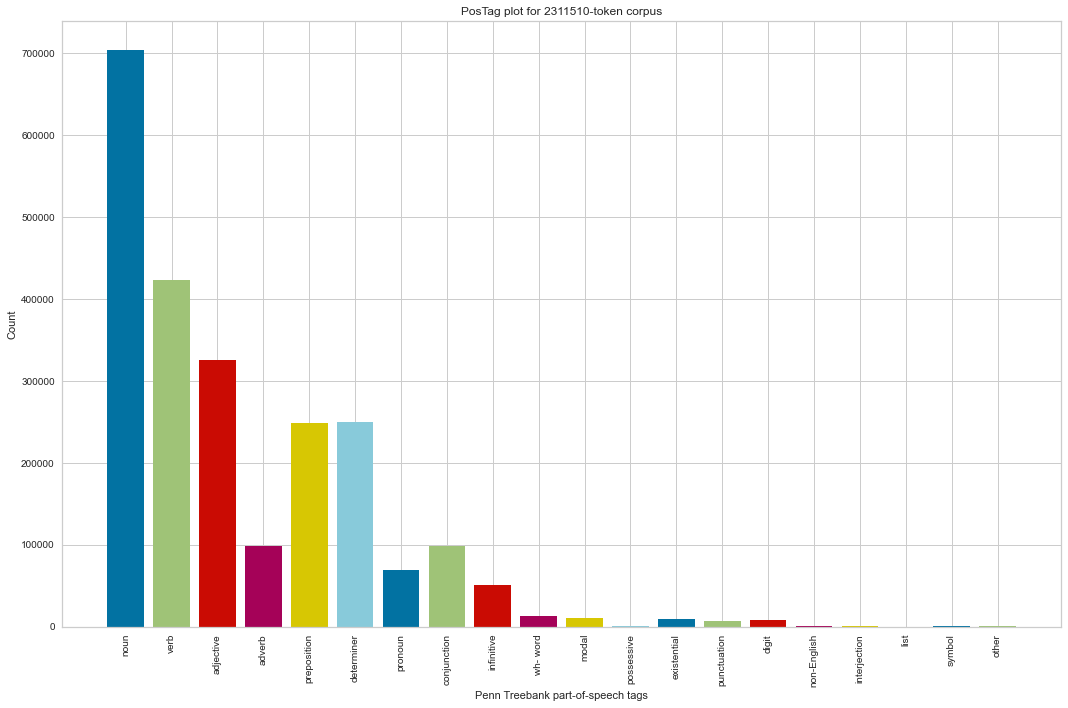

In [30]:
from yellowbrick.text import PosTagVisualizer

# # Create the visualizer, fit, score, and show it
viz = PosTagVisualizer(size=(1080, 720))
viz.fit(postags_plot)
viz.show(outpath="plots/tokens_plot_total_corpus.png")

In [31]:
# Selecting the nouns in our corpus
data['Nouns'] = data['POSTags'].apply(lambda x: [(t[0], t[1]) for t in x if t[1]=='NN' or t[1]=='NNP' or t[1]=='NNS' or t[1]=='NNPS'])

data['Nouns']

0       [(subjective, NN), (female, NN), (presents, NN...
1       [(history, NN), (difficulty, NN), (stairs, NNS...
2       [(history, NN), (illness, NN), (i, NN), (abc, ...
3       [(m-mode, NN), (enlargement, NN), (diameter, N...
4       [(left, NN), (cavity, NN), (size, NN), (wall, ...
                              ...                        
4961    [(history, NN), (i, NN), (pleasure, NN), (meet...
4962    [(diagnosis, NN), (kawasaki, NN), (disease, NN...
4963    [(subjective, NN), (female, NN), (today, NN), ...
4964    [(complaint, NN), (male, NN), (presents, NNS),...
4965    [(history, NN), (male, NN), (presents, NNS), (...
Name: Nouns, Length: 4966, dtype: object

In [32]:
#get the nouns in the tuples
to_be_lemmatized = []

for nouns_per_medical_specialties in data['Nouns']:
    
    
    words2lemmatied = []
    for word in nouns_per_medical_specialties:
        words2lemmatied.append(word[0])
    
    to_be_lemmatized.append(words2lemmatied)


data['to_be_lemmatized'] = to_be_lemmatized
data['to_be_lemmatized']

0       [subjective, female, presents, complaint, alle...
1       [history, difficulty, stairs, difficulty, airl...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4961    [history, i, pleasure, meeting, patient, today...
4962    [diagnosis, kawasaki, disease, discharge, diag...
4963    [subjective, female, today, physical, asthma, ...
4964    [complaint, male, presents, children, hospital...
4965    [history, male, presents, today, recommendatio...
Name: to_be_lemmatized, Length: 4966, dtype: object

In [33]:
#lemmatizing
from nltk.stem import WordNetLemmatizer

lmtzr = WordNetLemmatizer()


data['lemmatize'] = data['to_be_lemmatized'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])
print(data['lemmatize'])

# data['to_be_lemmatized'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])



0       [subjective, female, present, complaint, aller...
1       [history, difficulty, stair, difficulty, airli...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4961    [history, i, pleasure, meeting, patient, today...
4962    [diagnosis, kawasaki, disease, discharge, diag...
4963    [subjective, female, today, physical, asthma, ...
4964    [complaint, male, present, child, hospital, em...
4965    [history, male, present, today, recommendation...
Name: lemmatize, Length: 4966, dtype: object


In [34]:
data.sample(5)

,description,medical_specialty,sample_name,transcription,tokenized_sents,POSTags,Nouns,to_be_lemmatized,lemmatize
2966,The patient is admitted with a diagnosis of a...,Nephrology,Nephrology Consultation - 4,history the patient is a -year-old male pati...,"[history, the, patient, is, a, -year-old, male...","[(history, NN), (the, DT), (patient, NN), (is,...","[(history, NN), (patient, NN), (patient, NN), ...","[history, patient, patient, i, patient, blood,...","[history, patient, patient, i, patient, blood,..."
3162,Excisional biopsy of right cervical lymph node.,Hematology - Oncology,Biopsy - Cervical Lymph Node,preoperative diagnosis cervical lymphadenopath...,"[preoperative, diagnosis, cervical, lymphadeno...","[(preoperative, JJ), (diagnosis, NN), (cervica...","[(diagnosis, NN), (diagnosis, NN), (procedure,...","[diagnosis, diagnosis, procedure, biopsy, lymp...","[diagnosis, diagnosis, procedure, biopsy, lymp..."
2539,Bilateral breast MRI with & without IV contrast.,Obstetrics / Gynecology,MRI Breast - 1,findingsthere are post biopsy changes seen in ...,"[findingsthere, are, post, biopsy, changes, se...","[(findingsthere, RB), (are, VBP), (post, JJ), ...","[(biopsy, NN), (changes, NNS), (region, NN), (...","[biopsy, changes, region, aspect, left, breast...","[biopsy, change, region, aspect, left, breast,..."
648,Microscopic-assisted revision of bilateral de...,Surgery,Laminectomy & Foraminotomy Revision,preoperative diagnoses recurrent spinal stenos...,"[preoperative, diagnoses, recurrent, spinal, s...","[(preoperative, JJ), (diagnoses, NNS), (recurr...","[(diagnoses, NNS), (stenosis, NN), (l, NN), (-...","[diagnoses, stenosis, l, -ll, -land, l, -s, sp...","[diagnosis, stenosis, l, -ll, -land, l, -s, sp..."
4831,Abnormal EKG and rapid heart rate. The patie...,Cardiovascular / Pulmonary,Consult - Abnormal EKG,reason for consultation abnormal ekg and rapid...,"[reason, for, consultation, abnormal, ekg, and...","[(reason, NN), (for, IN), (consultation, NN), ...","[(reason, NN), (consultation, NN), (ekg, NN), ...","[reason, consultation, ekg, heart, rate, histo...","[reason, consultation, ekg, heart, rate, histo..."


In [35]:
print(data['lemmatize'])

0       [subjective, female, present, complaint, aller...
1       [history, difficulty, stair, difficulty, airli...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4961    [history, i, pleasure, meeting, patient, today...
4962    [diagnosis, kawasaki, disease, discharge, diag...
4963    [subjective, female, today, physical, asthma, ...
4964    [complaint, male, present, child, hospital, em...
4965    [history, male, present, today, recommendation...
Name: lemmatize, Length: 4966, dtype: object


In [36]:
type(data['lemmatize'])

pandas.core.series.Series

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4966 non-null   object
 1   medical_specialty  4966 non-null   object
 2   sample_name        4966 non-null   object
 3   transcription      4966 non-null   object
 4   tokenized_sents    4966 non-null   object
 5   POSTags            4966 non-null   object
 6   Nouns              4966 non-null   object
 7   to_be_lemmatized   4966 non-null   object
 8   lemmatize          4966 non-null   object
dtypes: object(9)
memory usage: 349.3+ KB


In [38]:
len(data['lemmatize'][1])


129

In [39]:
data['lemmatize_count'] = data['lemmatize'].astype('str')
data['lemmatize_count']=data['lemmatize_count'].str.split().str.len()

In [40]:
data.sample(5)

,description,medical_specialty,sample_name,transcription,tokenized_sents,POSTags,Nouns,to_be_lemmatized,lemmatize,lemmatize_count
2499,Ultrasound OB - followup for fetal growth.,Obstetrics / Gynecology,Ultrasound OB,reason for exam followup for fetal growth ...,"[reason, for, exam, followup, for, fetal, grow...","[(reason, NN), (for, IN), (exam, NN), (followu...","[(reason, NN), (exam, NN), (followup, NN), (gr...","[reason, exam, followup, growth, interpretatio...","[reason, exam, followup, growth, interpretatio...",70
3338,Patient in with mom for possible ear infection.,General Medicine,Gen Med Consult - 23,subjective mom brings the patient in today fo...,"[subjective, mom, brings, the, patient, in, to...","[(subjective, JJ), (mom, NN), (brings, VBZ), (...","[(mom, NN), (patient, NN), (today, NN), (infec...","[mom, patient, today, infection, ear, pain, to...","[mom, patient, today, infection, ear, pain, to...",81
3628,"Colonoscopy due to rectal bleeding, constipat...",Gastroenterology,Colonoscopy - 1,indication rectal bleeding constipation abn...,"[indication, rectal, bleeding, constipation, a...","[(indication, NN), (rectal, NN), (bleeding, VB...","[(indication, NN), (rectal, NN), (constipation...","[indication, rectal, constipation, ct, rule, i...","[indication, rectal, constipation, ct, rule, i...",12
30,The patient noted for improving retention of ...,Urology,Urinary Retention - Followup,history of present illness the patient present...,"[history, of, present, illness, the, patient, ...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (patient, NN), ...","[history, illness, patient, presents, today, f...","[history, illness, patient, present, today, fo...",57
3555,EGD with dilation for dysphagia.,Gastroenterology,EGD with Dilation,indication,[indication],"[(indication, NN)]","[(indication, NN)]",[indication],[indication],1


In [41]:
del data['to_be_lemmatized']
del data['sample_name']

In [42]:
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count
236,Insertion of transesophageal echocardiography...,Surgery,indications for procedure impending open hear...,"[indications, for, procedure, impending, open,...","[(indications, NNS), (for, IN), (procedure, NN...","[(indications, NNS), (procedure, NN), (heart, ...","[indication, procedure, heart, surgery, closur...",97
3570,Patient with a history of a Nissen fundoplica...,Gastroenterology,admitting diagnoses hiatal hernia gastroesop...,"[admitting, diagnoses, hiatal, hernia, gastroe...","[(admitting, VBG), (diagnoses, NNS), (hiatal, ...","[(diagnoses, NNS), (hernia, NN), (gastroesopha...","[diagnosis, hernia, gastroesophageal, reflux, ...",140
541,Right nodular malignant mesothelioma.,Surgery,preoperative diagnosis right mesothelioma po...,"[preoperative, diagnosis, right, mesothelioma,...","[(preoperative, JJ), (diagnosis, NN), (right, ...","[(diagnosis, NN), (diagnosis, NN), (lung, NN),...","[diagnosis, diagnosis, lung, mass, diaphragm, ...",252
2985,Acute on chronic renal failure and uremia. I...,Nephrology,preoperative diagnoses acute on chronic renal ...,"[preoperative, diagnoses, acute, on, chronic, ...","[(preoperative, JJ), (diagnoses, NNS), (acute,...","[(diagnoses, NNS), (failure, NN), (diagnoses, ...","[diagnosis, failure, diagnosis, failure, proce...",91
723,Construction of right upper arm hemodialysis ...,Surgery,preoperative diagnosis end-stage renal disease...,"[preoperative, diagnosis, end-stage, renal, di...","[(preoperative, JJ), (diagnosis, NN), (end-sta...","[(diagnosis, NN), (disease, NN), (dialysis, NN...","[diagnosis, disease, dialysis, fistula, diagno...",113


In [43]:
data.reset_index(drop=True)


,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count
0,A 23-year-old white female presents with comp...,Allergy / Immunology,subjective this -year-old white female pres...,"[subjective, this, -year-old, white, female, p...","[(subjective, NN), (this, DT), (-year-old, JJ)...","[(subjective, NN), (female, NN), (presents, NN...","[subjective, female, present, complaint, aller...",49
1,Consult for laparoscopic gastric bypass.,Bariatrics,past medical history he has difficulty climbin...,"[past, medical, history, he, has, difficulty, ...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129
2,Consult for laparoscopic gastric bypass.,Bariatrics,history of present illness i have seen abc tod...,"[history, of, present, illness, i, have, seen,...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement with left...,"[-d, m-mode, left, atrial, enlargement, with, ...","[(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...","[(m-mode, NN), (enlargement, NN), (diameter, N...","[m-mode, enlargement, diameter, cm, size, righ...",22
4,2-D Echocardiogram,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"[the, left, ventricular, cavity, size, and, wa...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65
...,...,...,...,...,...,...,...,...
4961,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"[history, i, had, the, pleasure, of, meeting, ...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245
4962,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,admitting diagnosis kawasaki disease discharg...,"[admitting, diagnosis, kawasaki, disease, disc...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79
4963,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a -year-old white female ...,"[subjective, this, is, a, -year-old, white, fe...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185
4964,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this -year-old male presents ...,"[chief, complaint, this, -year-old, male, pres...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136


In [44]:
from collections import Counter
dictionary= data['lemmatize'].transform(lambda x: Counter(x)).sum()
dictionary

for k in sorted(dictionary, key=dictionary.get, reverse=True):
    print(k, dictionary[k])

patient 23378
history 9438
procedure 7791
pain 5444
time 4927
/ 4844
i 4675
diagnosis 4522
incision 3905
blood 3803
room 3497
s 3329
day 3325
artery 3162
area 3091
skin 2939
medication 2765
mg 2757
suture 2744
extremity 2718
disease 2631
position 2630
tissue 2536
left 2490
pressure 2479
fashion 2441
x 2404
anesthesia 2311
surgery 2151
heart 2124
mass 2120
condition 2083
evidence 2075
examination 2057
operating 2055
abdomen 2022
muscle 1992
neck 1990
week 1987
lesion 1978
side 1973
catheter 1966
year 1926
complication 1889
level 1874
sign 1857
vicryl 1824
wound 1796
loss 1791
family 1759
risk 1746
care 1739
nerve 1733
symptom 1706
rate 1660
p 1652
head 1628
finding 1628
system 1607
eye 1597
change 1583
foot 1576
bone 1572
right 1548
dissection 1505
tube 1485
dr 1473
point 1461
plan 1459
problem 1458
difficulty 1448
bladder 1436
none 1403
lung 1397
treatment 1382
status 1376
cm 1364
today 1358
exam 1357
female 1351
chest 1340
hospital 1332
site 1328
bowel 1321
knee 1300
evaluation 1296
v

band 152
ounce 152
versus 152
cystoscopy 151
gram 151
etiology 151
output 151
interval 151
perfusion 151
signal 151
hepatitis 150
step 150
tooth 150
cholecystectomy 150
chloride 150
birth 149
inr 149
urinalysis 149
tremor 149
percussion 149
thing 148
rule 148
auscultation 148
hyperlipidemia 148
testing 148
name 147
station 147
collateral 147
observation 147
dizziness 147
tachycardia 147
prophylaxis 146
med 146
monitor 146
esmarch 146
entry 146
dementia 146
enlargement 145
pad 145
december 145
duodenum 144
naris 144
mixture 144
flexor 144
lymphadenopathy 143
mattress 143
transfer 143
score 143
dysuria 142
iron 142
velocity 142
adenopathy 141
dysphagia 141
ulceration 141
emg 141
surgeon 140
implantation 140
periosteum 140
interpretation 140
effort 140
tylenol 139
transplant 139
mucosal 139
qd 139
sample 138
loop 138
sweat 138
endoscope 138
osteoarthritis 137
roll 137
drape 137
’ 137
hemorrhoid 136
index 136
preparation 136
relief 136
extraction 136
rupture 136
immunization 135
dialysis 1

hemovac 50
inpatient 50
tonsillitis 50
boot 50
consumption 50
vibration 50
inhaler 50
huntington 50
dry 49
opportunity 49
periphery 49
vaginalis 49
recheck 49
percocet 49
varicosity 49
ramus 49
front 49
burn 49
-cm 49
plateau 49
cutting 49
peg 49
smear 49
persistent 49
triangle 49
brainstem 49
oncology 49
phase 49
spondylolisthesis 49
nexium 49
sentence 49
advair 49
correlation 49
leaflet 48
rue 48
stabilization 48
university 48
torsion 48
dartos 48
zocor 48
tinnitus 48
nitroglycerin 48
penrose 48
mesoappendix 48
premature 48
retrobulbar 48
snare 48
bs 48
abds 48
purchase 48
augmentation 48
subscapularis 48
vulsellum 48
supraspinatus 48
atmosphere 48
keratome 48
creation 48
sclerosis 48
gastroscope 48
clonus 48
dad 48
ache 48
ativan 48
protonix 48
tab 48
serving 48
ventilation 47
manipulation 47
standpoint 47
scissor 47
caudal 47
ampulla 47
method 47
pulsation 47
glidewire 47
surgicel 47
hydration 47
city 47
chordee 47
configuration 47
bruising 47
people 47
effacement 47
vacuum 47
rubb

bloody 29
crystalloid 29
occult 29
backwards 29
turp 29
subcu 29
curettings 29
antigen 29
cutter 29
penicillin 29
checkup 29
fetus 29
bursitis 29
drum 29
nick 29
crescent 29
act 29
thoracoscopy 29
bout 29
asa 29
cry 29
foraminotomy 29
ampicillin 29
neurosurgery 29
confirmation 29
adductor 29
joule 29
pcp 29
comminution 29
-inch 29
arteriogram 29
mental 29
error 29
proprioception 29
flonase 29
hepatomegaly 29
mcv 29
gabapentin 29
impact 29
pnd 29
bpm 29
bathroom 29
lithium 29
rpr 29
tachypnea 29
spike 28
security 28
dorsi 28
boyfriend 28
anger 28
mca 28
tubing 28
alteration 28
ridge 28
stream 28
pyelogram 28
ta 28
xand 28
plexus 28
modification 28
pleasure 28
locking 28
ebl 28
polyuria 28
sling 28
stockinette 28
sclera 28
uterine 28
olecranon 28
lash 28
chamfer 28
synovium 28
fasciotomy 28
exit 28
argon 28
gastroenteritis 28
beach 28
hank 28
interest 28
conduit 28
hamstring 28
boston 28
intensification 28
lvedp 28
virus 28
mrsa 28
lima 28
photophobia 28
coarctation 28
lipid 28
community

card 19
glioblastoma 19
axillary 19
apartment 19
warfarin 19
fingertip 19
normocephalic 19
drinker 19
jvp 19
amlodipine 19
plt 19
monocyte 19
electrophoresis 19
symmetric 19
likelihood 19
mra 19
osteopenia 19
cymbalta 19
re 19
subcostal 18
aspirate 18
caudate 18
dark 18
w 18
cricoid 18
outside 18
harvesting 18
al 18
violation 18
determination 18
pharyngitis 18
significance 18
-degree 18
morbidity 18
superior 18
processus 18
adherence 18
parker 18
balfour 18
employment 18
classification 18
okay 18
wydase 18
attending 18
phlebectomy 18
weitlaner 18
stretch 18
exsanguination 18
mole 18
hulka 18
echocardiography 18
style 18
insert 18
spatula 18
electrocoagulation 18
nexgen 18
ware 18
rotators 18
necessity 18
stand 18
cricothyroid 18
hypoglossal 18
marginal 18
atrial 18
stainless 18
pro 18
ten 18
hyoid 18
spreader 18
tobradex 18
orbicularis 18
smk 18
calm 18
tetracaine 18
sweep 18
cystotome 18
interscalene 18
capsuloperiosteal 18
bier 18
mandibular 18
trajectory 18
glue 18
microdebrider 18


wnl 12
receptor 12
literature 12
meq/l 12
occupation 12
overdose 12
stepfather 12
pharmacy 12
clothing 12
law 12
soma 12
fluticasone 12
mattis 12
smell 12
booster 12
/in 12
resource 12
anticipatory 12
doxorubicin 12
candidiasis 12
j-tube 12
multisystem 12
stance 12
applanation 12
dna 12
homocystine 12
decongestant 12
eosinophil 12
dermatologist 12
igm 12
sprint 12
orthopedic 11
relaxation 11
lateralization 11
ob/gyn 11
county 11
pretracheal 11
extrusion 11
consults 11
saver 11
wear 11
anterograde 11
hibiclens 11
floseal 11
physical 11
urologist 11
bath 11
hcg 11
vaseline 11
vacation 11
macrodantin 11
ureteroscopy 11
sunday 11
appliance 11
enterococcus 11
winter 11
spoke 11
depressor 11
anesthetist 11
soak 11
oversewn 11
loosening 11
close 11
rent 11
measuring 11
debulking 11
perimeter 11
fine 11
mandible 11
cisterna 11
redundant 11
restenosis 11
spotting 11
laminar 11
underneath 11
vagus 11
tarsal 11
colorado 11
satisfactory 11
buckle 11
thinning 11
metatarsocuneiform 11
lag 11
package

itchy 8
xerostomia 8
schatzker 8
onychomycosis 8
journal 8
cetaphil 8
carvedilol 8
elevates 8
neovascularization 8
abilify 8
widow 8
-channel 8
asleep 8
disorientation 8
visceromegaly 8
exhibit 8
ptca 8
pneumothoraces 8
t-spine 8
/csf 8
elisa 8
pp/lt/vib 8
lft 8
acromiale 8
l-spine 8
mestinon 8
dysesthesia 8
childbirth 8
rmca 8
posturing 8
diazepam 8
sem 8
hyperintense 8
print 8
yr 8
praxis 8
/which 8
ventriculomegaly 8
reinnervation 8
immobilization 8
birads 8
church 8
authorization 8
world 8
multilevel 8
stranding 8
unsteadiness 8
lawn 8
humulin 8
choreiform 8
g/dl 8
/hct 8
simulator 8
property 8
ecotrin 8
ad 8
spouse/partner 8
restless 8
bill 8
oxide 8
sobriety 8
seclusion 8
spelling 8
terrace 8
tyler 8
sleeping 8
last 8
discord 8
leave 8
math 8
club 8
vytorin 8
hemotympanum 8
mag 8
industry 8
corporation 8
tactile 8
tpa 8
oppositionality 8
appear 8
ag 8
analog 8
aide 8
uri 8
hypoparathyroidism 8
moro 8
psh 8
gingival 8
ovale 8
neosure 8
diazoxide 8
ill 8
celsius 8
neutropenia 8
bre

impulsivity 6
tox 6
temazepam 6
starlix 6
barbiturate 6
suspect 6
remeron 6
confidentiality 6
concept 6
everyone 6
temperament 6
grandparent 6
custody 6
qualifies 6
ukraine 6
coworker 6
lapse 6
mistake 6
jack 6
tower 6
plum 6
artane 6
drunk 6
restorator 6
awareness 6
worsens 6
/hip 6
doxepin 6
grain 6
ortolani 6
daycare 6
situs 6
morphologic 6
prostaglandin 6
circumduction 6
allergist 6
yogurt 6
phototherapy 6
nicu 6
madera 6
kawasaki 6
radiologic 6
flag 6
optimization 6
peho 6
nontoxic 6
vomitus 6
pizza 6
alertness 6
amoxil 6
aldex 6
sit 6
wasting 6
waddell 6
spurling 6
polyarthritis 6
thoracalgia 6
bracing 6
osteoarthrosis 6
intrinsics 6
player 6
juvenile 6
predischarge 6
subtle 6
gonioscopy 6
drusen 6
label 6
bruisability 6
brudzinski 6
hyperresonance 6
homan 6
bulla 6
heel-to-shin 6
short- 6
straight-leg 6
premalignant 6
myoclonus 6
transformation 6
systemsheent 6
psych 6
cholestasis 6
pam 6
cuing 6
examinationmental 6
antiplatelet 6
polypharmacy 6
namenda 6
farm 6
toxicology 6
alt

oncocytoma 4
flaring 4
bka 4
triple-lumen 4
phisohex 4
outfracture 4
encrustation 4
crosswise 4
aortography 4
sprinter 4
electrodessication 4
cryostat 4
sec 4
disadvantage 4
intraarticular 4
micro-aire 4
goldenberg 4
oval 4
alexander 4
dedo 4
mylohyoid 4
jps 4
auscultatory 4
shear 4
silicon 4
frosting 4
conservation 4
cmf 4
btl 4
disproportion 4
asynclitism 4
prodromal 4
-chromic 4
iugr 4
avitene 4
-vessel 4
sampling 4
pennington 4
popliteus 4
donjoy 4
mcp 4
diagnosesxxx 4
monoka 4
vocal 4
photo-ablation 4
choledochoscope 4
morcellator 4
needing 4
bloating 4
endoclips 4
reusable 4
adapter 4
reducer 4
studding 4
radical 4
glycol 4
carlos 4
suprapubic 4
double-action 4
exterior 4
dupre 4
kyphon 4
filler 4
aphakia 4
trephine 4
synechiae 4
masticatory 4
ilium 4
particulate 4
peroxide 4
mid-shaft 4
peristalsis 4
bullosa 4
humi 4
cystotomy 4
thighthis 4
boat 4
systemscardiac 4
ssor 4
hickman 4
bicep 4
meningeal 4
subcapital 4
cork 4
trileaflet 4
preinjection 4
postinjection 4
reopro 4
aicd 4

ssmurmur 4
zyvox 4
winkel 4
war 4
anaphylaxis 4
defecation 4
disclosure 4
thou/µl 4
seroconversion 4
hypoglycemics 4
bay 4
polys 4
transglutaminase 4
ada 4
irc 4
zolpidem 4
triamterene 4
bright 4
dysmotility 4
cholestyramine 4
frenzel 4
dix-hallpike 4
halmagyi 4
betahistine 4
polychondritis 4
excedrin 4
cereal 4
q-waves 4
v/q 4
shone 4
eg 4
cosyntropin 4
pulmonology 4
bird 4
duoneb 4
pro-bnp 4
rnp 4
glycoprotein 4
sarcoid 4
methylmalonic 4
aggregation 4
hypochromia 4
reticularis 4
physique 4
tartrate 4
neb 4
grandson 4
dysrhythmia 4
creon 4
novolog 4
regain 4
physiologist 4
cardiopulmonary 4
bsn 4
harris 4
responds 4
meloxicam 4
mini-strokes 4
sensipar 4
epipen 4
/fvc 4
decedent 4
pearlescent 4
surgidac 3
passageway 3
seamguard 3
thereby 3
antegastric 3
anastamosis 3
signing 3
putamen 3
diprivan 3
fishbone 3
sufficient 3
desiring 3
technetium 3
orthotopic 3
comorbid 3
pre-plan 3
comparing 3
brachytherapist 3
overdosage 3
armband 3
hanger 3
pant 3
avenue 3
xyzxxxx 3
perspective 3
spatul

most 3
atfl 3
calcaneocuboid 3
tarsometarsal 3
mucocyst 3
opponens 3
ortho-glass 3
duac 3
loprox 3
-left 3
slimlock 3
hnp 3
incentive 3
evaluation/x-rays 3
chevron 3
plantarflexion 3
sunglass 3
mrv 3
developer 3
chalazion 3
musculoskeletal/extremities 3
double 3
misalignment 3
coupon 3
varies 3
neupogen 3
consolidative 3
clerk 3
pyelo 3
baptist 3
misorder 3
greenville 3
wilkesboro 3
-at 3
chorioamnionitis 3
lochia 3
triple 3
reforming 3
topography 3
dining 3
capability 3
wheelchair-bound 3
ringing 3
specialty 3
thanksgiving 3
role 3
fragile 3
subacromion 3
suprascapular 3
problems/diagnoses 3
coolidge 3
gilbert 3
equivocal 3
assay 3
thalassemia 3
tumour 3
ether 3
/left 3
handgrip 3
mpression 3
pallidus 3
neuro-oncology 3
micturition 3
nephritis 3
cellcept 3
acyclovir 3
esrd 3
metastasizing 3
reconciliation 3
nephrogram 3
ckd 3
apneic 3
metabolism 3
herb 3
satiety 3
kinase 3
poquito 3
floragon 3
forest 3
hyperextend 3
lifetime 3
straightforward 3
conversant 3
squat 3
hop 3
kemp 3
inclin

approximate 2
shepard 2
neurosensory 2
perfection 2
mid-stenosis 2
overlapping 2
rewires 2
post-dilatation 2
reuter 2
annuloplasty 2
cosgrove 2
galloway 2
fuser 2
sondergaard 2
chordae 2
mumford 2
systolics 2
langer 2
acromioplasty 2
crevice 2
fisch 2
stapedectomy 2
hub 2
microsuspension 2
sporadic 2
droopy 2
histopathologic 2
rootlet 2
taking 2
grooving 2
binder 2
microfacial 2
metastasectomy 2
evicel 2
inspite 2
circumdental 2
mckissock 2
deepithelialization 2
vertically 2
melasma 2
thigh/popliteal 2
subglandular 2
hypomastia 2
performedlysis 2
infiltrating 2
diener 2
wilmot 2
microlumbar 2
extrudes 2
footling 2
obstetrician 2
maxon 2
afof 2
ivda 2
innermost 2
gpara 2
ruddy 2
freehand 2
tastapler 2
hysterotomy 2
two-layer 2
glover 2
ta-stapler 2
wrist-guard 2
tumescent 2
tangent 2
pivot 2
trampoline 2
gracilis 2
whip 2
puller 2
beak 2
trapezoid 2
trapezial 2
scaphotrapezoidal 2
proceduresrepair 2
him/her 2
seater 2
mouthguard 2
louie 2
valecula 2
reintubation 2
reid 2
broad- 2
quant 

rhytids 2
gastroc-soleus 2
lamisil 2
cleansing 2
symlin 2
carb/insulin 2
nonacute 2
leucocytosis 2
epo 2
residency 2
ongoing 2
fnp 2
burdensome 2
cystectomies 2
assessmentosteoarthritis 2
recommendationsagree 2
nph 2
chondroitin/glucosamine 2
nt 2
hsm 2
oa 2
nephrosis 2
-hydroxy-vitamin 2
mucosus 2
pre-meal 2
c-peptide 2
warranty 2
medicare 2
tremoring 2
ccccand 2
cervicalgia 2
gastroenterologic 2
-meq 2
cad-status 2
dyspnea-seems 2
prevention-i 2
zometa 2
faslodex 2
aromasin 2
ctsu/c 2
ixabepilone 2
avastin 2
mucinex 2
cleanness 2
hello 2
luvox 2
ocd 2
nottingham 2
/neu 2
antiestrogen 2
informs 2
pacific 2
s/mid 2
sgot 2
sgpt 2
pma 2
hyperdefecation 2
quantitative 2
planthis 2
ttsh 2
photofacials 2
benzoyl 2
tazorac 2
antiviral 2
tspike 2
implication 2
pulmonale 2
highlight 2
plms 2
compumedics 2
polysomnograph 2
-ac 2
-ao 2
-a 2
-aeog 2
electrocardiography 2
prm 2
recommendationsaxis 2
polysomnography 2
ahi 2
oral/nasal 2
intermixed 2
awake/alert/drowsy 2
-cycle/second 2
cycle/second

alevels 2
meshwork 2
gonio-compression 2
gdx 2
applanations 2
conj 2
cup-to-disc 2
fuchs 2
tonometry 2
stroma 2
endothelium 2
/ou 2
finalod 2
fresnel 2
pityrosporum 2
goldberg 2
presbyopia 2
commence 2
preservision 2
capulets 2
humphrey 2
eltroxin 2
plendil 2
make-up 2
myopia 2
osteodystrophy 2
guy 2
corpsman 2
reminds 2
tomato 2
sauce 2
glad 2
walgreens 2
depo-provera 2
polyspike 2
demeanor 2
precursor 2
adeno 2
cornealis 2
radioiodine 2
propylthiouracil 2
exophthalmus 2
huffman 2
bradycardic 2
brighter 2
cad/angina 2
lotrel 2
tummy 2
rosacea 2
notify 2
parkway 2
expectoration 2
-beats 2
novolin 2
clayton 2
folic 2
mortensen 2
eclampsia 2
horseback 2
riding 2
cytobrush 2
ecc 2
visitpelvic 2
colposcopic 2
spgr 2
endomyometritis 2
cervicitis 2
endocervicitis 2
rain 2
bee/wasp 2
dander 2
parametria 2
fbs 2
acetowhite 2
prophylactically 2
leep 2
gardasil 2
gravid 2
trichomonas 2
gonorrhea 2
gardnerella 2
weck 2
menometrorrhagia 2
luteal 2
posttransfusion 2
hepatologist 2
copper 2
ashen 2


antemortem 2
defense 2
metallic 2
gray-pink 2
sensitivitygram 2
antigenshemophilus 2
pneumoniae 2
meningitidis 2
neiserria 2
o+ 2
stria 2
leiomyoma 2
sleeveless 2
turtleneck 2
sweatpants 2
hoop 2
hemorrhaging 2
blonde 2
strangulation 2
abrasion/contusion 2
one-eight 2
purple 2
one-sixteenth 2
illnessi 1
slippage 1
bariatrics 1
vincent 1
surgisis 1
vesseloops 1
comedo 1
surrounding 1
foul-smelling 1
transperineal 1
chattanooga 1
episioproctotomy 1
commencement 1
locationing 1
aspirant 1
diagnosisleft 1
mammosite 1
performedexcision 1
jackknife 1
hexedine 1
pps 1
employed 1
deinsufflation 1
indirect 1
birthmark 1
pencil 1
mic-key 1
toxoid 1
tincture 1
redraining 1
tidal 1
cothis 1
glottic 1
propane 1
silvadene 1
thermometer 1
jehovah 1
deck 1
fasciotomies 1
minnesota 1
aortic 1
periaortic 1
da 1
vinci 1
lymphoid 1
thompson 1
on-line 1
web 1
semester 1
k+ 1
nsvt 1
gastro 1
a/p 1
d/c 1
tirals 1
+n 1
listless 1
oyster 1
maxzide 1
/q 1
pamoate 1
pain/bone 1
pain/leg 1
aat 1
osa 1
bedding 1
u

In [45]:
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

# data['post_stopwords'] = data['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])
# data.sample(5)

In [46]:
data['tokenized_sents']=data['tokenized_sents'].astype('str')
data['tokenized_sents']

0       ['subjective', 'this', '-year-old', 'white', '...
1       ['past', 'medical', 'history', 'he', 'has', 'd...
2       ['history', 'of', 'present', 'illness', 'i', '...
3       ['-d', 'm-mode', 'left', 'atrial', 'enlargemen...
4       ['the', 'left', 'ventricular', 'cavity', 'size...
                              ...                        
4961    ['history', 'i', 'had', 'the', 'pleasure', 'of...
4962    ['admitting', 'diagnosis', 'kawasaki', 'diseas...
4963    ['subjective', 'this', 'is', 'a', '-year-old',...
4964    ['chief', 'complaint', 'this', '-year-old', 'm...
4965    ['history', 'a', '-year-old', 'male', 'present...
Name: tokenized_sents, Length: 4966, dtype: object

In [47]:
data['tokens'] = data['tokenized_sents'].str.split().str.len()
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
3966,"Skin biopsy, scalp mole. Darkened mole statu...",Dermatology,procedure skin biopsy scalp mole indication ...,"['procedure', 'skin', 'biopsy', 'scalp', 'mole...","[(procedure, NN), (skin, NN), (biopsy, NN), (s...","[(procedure, NN), (skin, NN), (biopsy, NN), (i...","[procedure, skin, biopsy, indication, female, ...",43,103
2090,"Open reduction and internal fixation, high gr...",Orthopedic,preoperative diagnosis severely comminuted fra...,"['preoperative', 'diagnosis', 'severely', 'com...","[(preoperative, JJ), (diagnosis, NN), (severel...","[(diagnosis, NN), (fracture, NN), (radius, NN)...","[diagnosis, fracture, radius, diagnosis, fract...",199,734
1222,Anterior cervical discectomy and osteophytect...,Surgery,preoperative diagnoses cervical radiculopathy...,"['preoperative', 'diagnoses', 'cervical', 'rad...","[(preoperative, JJ), (diagnoses, NNS), (cervic...","[(diagnoses, NNS), (c, NN), (-c, NN), (-c, NNP...","[diagnosis, c, -c, -c, spondylosis, c, -c, -c,...",340,1038
4105,Patient presents for treatment of suspected r...,Consult - History and Phy.,chief complaint this year old male presents t...,"['chief', 'complaint', 'this', 'year', 'old', ...","[(chief, JJ), (complaint, NN), (this, DT), (ye...","[(complaint, NN), (year, NN), (male, NN), (pre...","[complaint, year, male, present, today, treatm...",279,626
98,Direct right inguinal hernia. Marlex repair ...,Urology,preoperative diagnosis right inguinal hernia ...,"['preoperative', 'diagnosis', 'right', 'inguin...","[(preoperative, JJ), (diagnosis, NN), (right, ...","[(diagnosis, NN), (hernia, NN), (diagnosis, NN...","[diagnosis, hernia, diagnosis, inguinal, herni...",79,282


In [48]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [49]:
#disproportion of corpora
data['medical_specialty'].value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Dentistry                          27
 Cosmetic / Plastic Surge

In [50]:
data['medical_specialty'].nunique()

40

In [51]:
# Categories to be removed

data = data[(data['medical_specialty'] != ' Discharge Summary')& 
            (data['medical_specialty'] != ' Office Notes') & 
            (data['medical_specialty'] != ' SOAP / Chart / Progress Notes') &
            (data['medical_specialty'] != ' Letters') &
            (data['medical_specialty'] != ' IME-QME-Work Comp etc.') &
           (data['medical_specialty'] != ' Hospice - Palliative Care')&
           (data['medical_specialty'] != ' Emergency Room Reports') &
            (data['medical_specialty'] != ' Autopsy')]
data

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,subjective this -year-old white female pres...,"['subjective', 'this', '-year-old', 'white', '...","[(subjective, NN), (this, DT), (-year-old, JJ)...","[(subjective, NN), (female, NN), (presents, NN...","[subjective, female, present, complaint, aller...",49,209
1,Consult for laparoscopic gastric bypass.,Bariatrics,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129,348
2,Consult for laparoscopic gastric bypass.,Bariatrics,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213,704
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement with left...,"['-d', 'm-mode', 'left', 'atrial', 'enlargemen...","[(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...","[(m-mode, NN), (enlargement, NN), (diameter, N...","[m-mode, enlargement, diameter, cm, size, righ...",22,62
4,2-D Echocardiogram,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221
...,...,...,...,...,...,...,...,...,...
4961,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245,792
4962,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,admitting diagnosis kawasaki disease discharg...,"['admitting', 'diagnosis', 'kawasaki', 'diseas...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79,262
4963,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a -year-old white female ...,"['subjective', 'this', 'is', 'a', '-year-old',...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185,716
4964,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this -year-old male presents ...,"['chief', 'complaint', 'this', '-year-old', 'm...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136,396


In [52]:
#Getting the mean and median across all tokens 
print(data['lemmatize_count'].mean())
print(data['lemmatize_count'].median())

142.30505095259193
126.0


In [53]:
#Getting the mean and median across all tokens 
print(data['lemmatize_count'].max())
print(data['lemmatize_count'].min())

837
1


In [54]:
data['lemmatize_count'].value_counts().sample(50)

308     2
9       3
42     18
393     2
270    13
220    13
4       2
223    11
29      4
361     4
352     4
332     2
149    11
356     3
261     4
165     8
226     9
259     9
193    12
340     5
70     24
115    22
55     21
157    21
237     7
122    14
166     9
343     2
249     2
208     5
156    18
161     8
390     1
200    16
455     2
290     5
45     19
153    18
119    17
50     18
91     27
164    18
286     9
117    24
247     8
61     37
174     9
363     2
395     1
123    16
Name: lemmatize_count, dtype: int64

In [55]:
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,1088,141.042279,121.0
Consult - History and Phy.,516,175.895349,157.0
Cardiovascular / Pulmonary,371,134.827493,119.0
Orthopedic,355,168.290141,154.0
Radiology,273,93.575092,77.0
General Medicine,259,148.961390,138.0
Gastroenterology,224,109.709821,93.0
Neurology,223,155.430493,142.0
Urology,156,119.282051,105.0


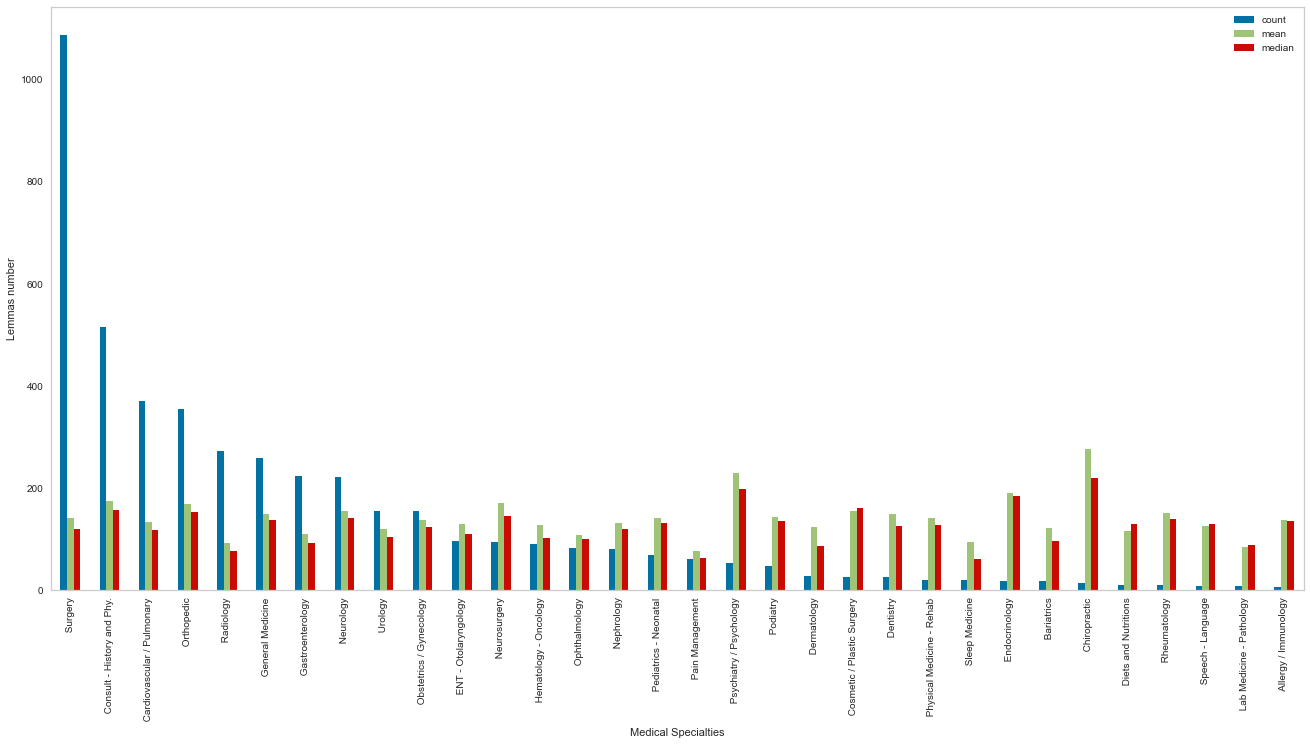

In [56]:
# A good snapshot: in our corpus there is a great number of texts for Surgery, but for practices like Psychiatry and 
#Immunology very few. Nonetheless, mean and median of tokes are high for those categories, which means that the corpora
#are long
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Lemmas number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)

In [57]:
#Decided to group some categories in sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
# # Combining similar offenses together
data = data.replace({' Sleep Medicine': " Sleep and Pain", ' Pain Management': " Sleep and Pain"})
data

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,subjective this -year-old white female pres...,"['subjective', 'this', '-year-old', 'white', '...","[(subjective, NN), (this, DT), (-year-old, JJ)...","[(subjective, NN), (female, NN), (presents, NN...","[subjective, female, present, complaint, aller...",49,209
1,Consult for laparoscopic gastric bypass.,Bariatrics,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129,348
2,Consult for laparoscopic gastric bypass.,Bariatrics,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213,704
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement with left...,"['-d', 'm-mode', 'left', 'atrial', 'enlargemen...","[(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...","[(m-mode, NN), (enlargement, NN), (diameter, N...","[m-mode, enlargement, diameter, cm, size, righ...",22,62
4,2-D Echocardiogram,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221
...,...,...,...,...,...,...,...,...,...
4961,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245,792
4962,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,admitting diagnosis kawasaki disease discharg...,"['admitting', 'diagnosis', 'kawasaki', 'diseas...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79,262
4963,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a -year-old white female ...,"['subjective', 'this', 'is', 'a', '-year-old',...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185,716
4964,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this -year-old male presents ...,"['chief', 'complaint', 'this', '-year-old', 'm...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136,396


In [58]:
# # Combining similar offenses together
#Group sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
data = data.replace({' Cosmetic / Plastic Surgery': " SKIN cosmetics", ' Dermatology': " SKIN cosmetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Dentistry                       27
 Physical Medicine - Rehab       21
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Rheumatology                    10
 Diets and Nutritions            10
 Speech - Language          

In [59]:
data = data.replace({' Chiropractic': " Physical Therapy", ' Physical Medicine - Rehab': " Physical Therapy"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dentistry                       27
 Endocrinology                   19
 Bariatrics                      18
 Diets and Nutritions            10
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology   

In [60]:
data = data.replace({' Bariatrics': " Dietetics", ' Diets and Nutritions': " Dietetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology       

In [61]:
data = data.replace({' Neurology': " Neurologists", ' Neurosurgery': " Neurologists"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Neurologists                   317
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology             7
Name: medical_specialty, dty

In [62]:
# Final count of medical specialties (for now)
data = data.replace({' Lab Medicine - Pathology': " Pathology"})
data['medical_specialty'].nunique()

27

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 0 to 4965
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4514 non-null   object
 1   medical_specialty  4514 non-null   object
 2   transcription      4514 non-null   object
 3   tokenized_sents    4514 non-null   object
 4   POSTags            4514 non-null   object
 5   Nouns              4514 non-null   object
 6   lemmatize          4514 non-null   object
 7   lemmatize_count    4514 non-null   int64 
 8   tokens             4514 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 512.7+ KB


In [64]:
#Setting a cutoff lowerbound (250 tokens) and upperbound (1000) for the number of Lemma
data = data[(data['lemmatize_count'] >= 60) & (data['lemmatize_count'] <= 250)]
print(data['lemmatize_count'].min())
print(data['lemmatize_count'].max())

60
250


In [65]:
data['medical_specialty'].nunique()

27

In [66]:
data['medical_specialty'].value_counts()

 Surgery                       818
 Consult - History and Phy.    396
 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Neurologists                  229
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
 Pediatrics - Neonatal          57
 SKIN cosmetics                 44
 Sleep and Pain                 41
 Psychiatry / Psychology        27
 Podiatry                       25
 Dentistry                      25
 Dietetics                      23
 Physical Therapy               21
 Endocrinology                  14
 Rheumatology                    8
 Speech - Language               7
 Pathology                       6
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [67]:
print(data['tokens'].min())
print(data['tokens'].max())

102
969


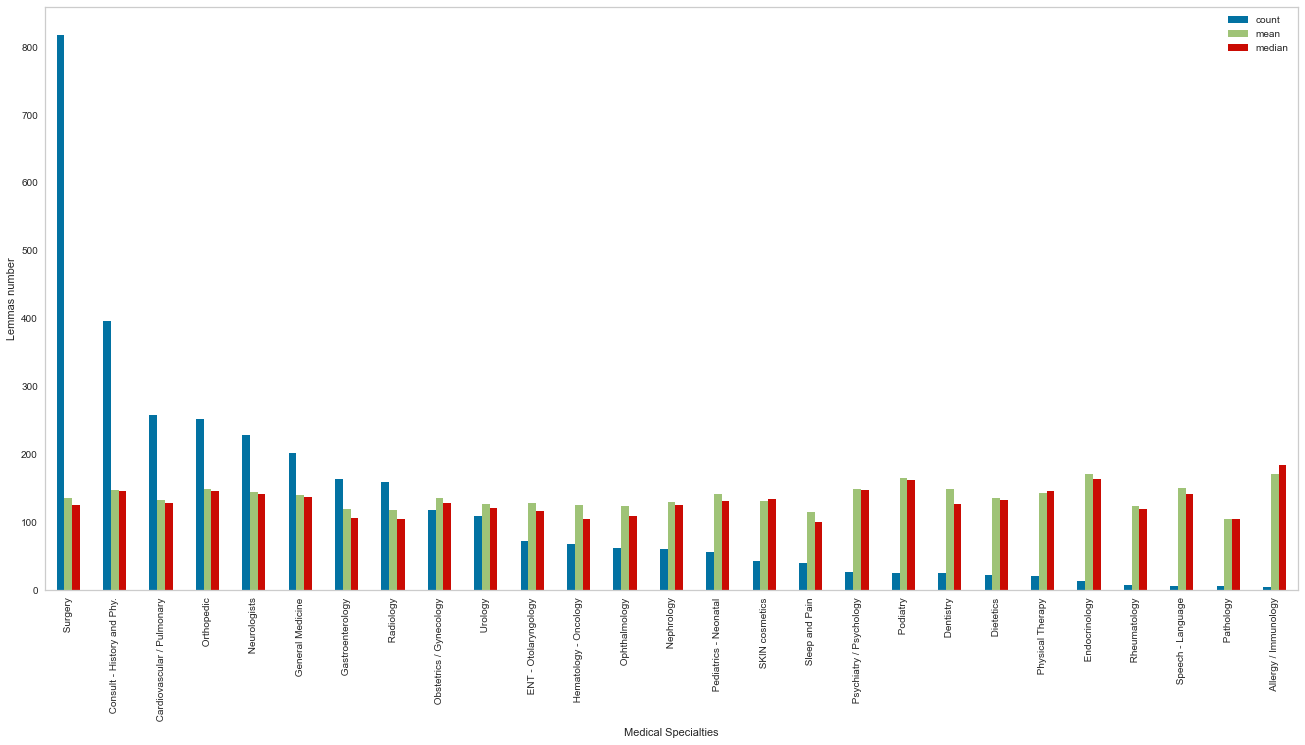

In [68]:
# Cleaned snapshot
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Lemmas number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)
plt.savefig('plots/Corpus_view_with_Lemmas_after_first_reduction.png')

In [69]:
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,818,135.338631,126.0
Consult - History and Phy.,396,147.989899,147.0
Cardiovascular / Pulmonary,259,133.814672,128.0
Orthopedic,253,149.158103,146.0
Neurologists,229,144.510917,142.0
General Medicine,203,141.088670,138.0
Gastroenterology,164,119.542683,107.0
Radiology,160,117.881250,105.0
Obstetrics / Gynecology,119,136.747899,129.0


In [70]:
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
1717,Cardiolite treadmill exercise stress test. T...,Radiology,cardiolite treadmill exercise stress test clin...,"['cardiolite', 'treadmill', 'exercise', 'stres...","[(cardiolite, NN), (treadmill, NN), (exercise,...","[(cardiolite, NN), (treadmill, NN), (exercise,...","[cardiolite, treadmill, exercise, stress, test...",67,193
4289,Local reaction secondary to insect sting. Pa...,Consult - History and Phy.,history of present illness patient is a -ye...,"['history', 'of', 'present', 'illness', 'patie...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (patient, NN), (male, NN), (wi...","[history, patient, male, wife, bee, hand, hand...",117,473
2382,"Cataract, right eye. Phacoemulsification wit...",Ophthalmology,preoperative diagnosis cataract right eye po...,"['preoperative', 'diagnosis', 'cataract', 'rig...","[(preoperative, JJ), (diagnosis, NN), (catarac...","[(diagnosis, NN), (cataract, NN), (eye, NN), (...","[diagnosis, cataract, eye, diagnosis, cataract...",90,298
4024,Nipple areolar reconstruction utilizing a ful...,SKIN cosmetics,preoperative diagnoses surgical absence of le...,"['preoperative', 'diagnoses', 'surgical', 'abs...","[(preoperative, JJ), (diagnoses, NNS), (surgic...","[(diagnoses, NNS), (absence, NN), (areola, NN)...","[diagnosis, absence, areola, history, breast, ...",179,610
2199,Hardware removal in the left elbow.,Orthopedic,preoperative diagnosis retained hardware in le...,"['preoperative', 'diagnosis', 'retained', 'har...","[(preoperative, JJ), (diagnosis, NN), (retaine...","[(diagnosis, NN), (hardware, NN), (elbow, NN),...","[diagnosis, hardware, elbow, diagnosis, hardwa...",121,365


In [71]:
# Decided to introduce an upperdown level for most populated categories
data_all_surgery = data[data['medical_specialty'] == ' Surgery']

In [72]:
data_all_surgery 

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
179,Wound debridement with removal of Surgisis xe...,Surgery,preoperative diagnoses open wound from right ...,"['preoperative', 'diagnoses', 'open', 'wound',...","[(preoperative, JJ), (diagnoses, NNS), (open, ...","[(diagnoses, NNS), (axilla, NN), (abdomen, NNS...","[diagnosis, axilla, abdomen, vascular, graft, ...",87,344
180,Visually significant posterior capsule opacit...,Surgery,preoperative diagnosis visually significant p...,"['preoperative', 'diagnosis', 'visually', 'sig...","[(preoperative, JJ), (diagnosis, NN), (visuall...","[(diagnosis, NN), (capsule, NN), (opacity, NN)...","[diagnosis, capsule, opacity, eye, diagnosis, ...",66,207
183,Placement of right new ventriculoperitoneal (...,Surgery,title of operation placement of right new vent...,"['title', 'of', 'operation', 'placement', 'of'...","[(title, NN), (of, IN), (operation, NN), (plac...","[(title, NN), (operation, NN), (placement, NN)...","[title, operation, placement, ventriculoperito...",75,268
188,Unilateral transpedicular T11 vertebroplasty.,Surgery,preoperative diagnosis tcompression fracture ...,"['preoperative', 'diagnosis', 'tcompression', ...","[(preoperative, JJ), (diagnosis, NN), (tcompre...","[(diagnosis, NN), (tcompression, NN), (fractur...","[diagnosis, tcompression, fracture, pain, diag...",105,356
189,Insertion of a VVIR permanent pacemaker. Thi...,Surgery,procedure performed insertion of a vvir perma...,"['procedure', 'performed', 'insertion', 'of', ...","[(procedure, NN), (performed, VBD), (insertion...","[(procedure, NN), (insertion, NN), (pacemaker,...","[procedure, insertion, pacemaker, complication...",189,602
...,...,...,...,...,...,...,...,...,...
1259,Removal of the hardware and revision of right...,Surgery,preoperative diagnosis right ac separation p...,"['preoperative', 'diagnosis', 'right', 'ac', '...","[(preoperative, JJ), (diagnosis, NN), (right, ...","[(diagnosis, NN), (separation, NN), (diagnosis...","[diagnosis, separation, diagnosis, separation,...",61,210
1260,"Excision of abscess, removal of foreign body....",Surgery,preoperative diagnosis recurrent re-infected s...,"['preoperative', 'diagnosis', 'recurrent', 're...","[(preoperative, JJ), (diagnosis, NN), (recurre...","[(diagnosis, NN), (recurrent, NN), (cyst, NN),...","[diagnosis, recurrent, cyst, abdomen, diagnosi...",91,344
1261,Congenital chylous ascites and chylothorax an...,Surgery,preoperative diagnoses congenital chylous ...,"['preoperative', 'diagnoses', 'congenital', 'c...","[(preoperative, JJ), (diagnoses, NNS), (congen...","[(diagnoses, NNS), (ascites, NNS), (chylothora...","[diagnosis, ascites, chylothorax, rule, leak, ...",214,823
1262,Incision and drainage (I&D) of abdominal absc...,Surgery,preoperative diagnosis abdominal wall abscess ...,"['preoperative', 'diagnosis', 'abdominal', 'wa...","[(preoperative, JJ), (diagnosis, NN), (abdomin...","[(diagnosis, NN), (wall, NN), (abscess, NN), (...","[diagnosis, wall, abscess, diagnosis, wall, pr...",91,313


In [73]:
data_no_surgery = data[data['medical_specialty'] != ' Surgery']

In [74]:
random_data_surgery = data_all_surgery.sample(n=250)

In [75]:
data = pd.concat([data_no_surgery, random_data_surgery])

In [76]:
data_all_consultancy = data[data['medical_specialty'] == ' Consult - History and Phy.']

In [77]:
data_no_consultancy = data[data['medical_specialty'] != ' Consult - History and Phy.']

In [78]:
random_data_consultancy = data_all_consultancy.sample(n=250)

In [79]:
data = pd.concat([data_no_consultancy, random_data_consultancy])

In [80]:
data['medical_specialty'].value_counts()

 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Surgery                       250
 Consult - History and Phy.    250
 Neurologists                  229
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
 Pediatrics - Neonatal          57
 SKIN cosmetics                 44
 Sleep and Pain                 41
 Psychiatry / Psychology        27
 Podiatry                       25
 Dentistry                      25
 Dietetics                      23
 Physical Therapy               21
 Endocrinology                  14
 Rheumatology                    8
 Speech - Language               7
 Pathology                       6
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [81]:
data = data.replace({' Pediatrics - Neonatal': " Others", " SKIN cosmetics": ' Others',' Sleep and Pain': ' Others',
                     ' Psychiatry / Psychology':' Others', ' Dentistry': ' Others', ' Podiatry':' Others'})
data['medical_specialty'].value_counts()

 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Surgery                       250
 Consult - History and Phy.    250
 Neurologists                  229
 Others                        219
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
 Dietetics                      23
 Physical Therapy               21
 Endocrinology                  14
 Rheumatology                    8
 Speech - Language               7
 Pathology                       6
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [82]:
data = data.replace({' Dietetics': " Others", " Physical Therapy": ' Others',' Endocrinology': ' Others',
                     ' Rheumatology':' Others', ' Speech - Language': ' Others', ' Pathology':' Others', ' Allergy / Immunology': ' Others' })
data['medical_specialty'].value_counts()

 Others                        303
 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Surgery                       250
 Consult - History and Phy.    250
 Neurologists                  229
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
Name: medical_specialty, dtype: int64

In [83]:
data.shape

(2563, 9)

In [84]:
# data['lemmatize_to_string']= data['lemmatize'].astype('str')
data['lemmatize_to_string']= data['lemmatize'].str.join(" ")
type(data['lemmatize_to_string'])

pandas.core.series.Series

# Baseline accuracy
It sets the benchmark in terms of minimum accuracy which the model should achieve. It is calculated as the number of times the majority class appears in the target variable, divided by the total number of observations.

In [85]:
print(303/2563)

0.11822083495903238


# Creating the Model

In [86]:
#Creating the label and Creating the Training and Test Datasets
#first thing to do is to separate out the label from the numerical dataframe
X = data.drop("medical_specialty", axis=1)
y = data["medical_specialty"]
#Imput is the X dataset. 
print(X.shape, y.shape)

(2563, 9) (2563,)


In [87]:
X

,description,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens,lemmatize_to_string
1,Consult for laparoscopic gastric bypass.,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129,348,history difficulty stair difficulty airline se...
2,Consult for laparoscopic gastric bypass.,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213,704,history illness i abc today gentleman year pou...
4,2-D Echocardiogram,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221,left cavity size wall thickness wall motion fu...
5,Morbid obesity. Laparoscopic antecolic anteg...,preoperative diagnosis morbid obesity postope...,"['preoperative', 'diagnosis', 'morbid', 'obesi...","[(preoperative, JJ), (diagnosis, NN), (morbid,...","[(diagnosis, NN), (morbid, NN), (obesity, NN),...","[diagnosis, morbid, obesity, diagnosis, morbid...",231,719,diagnosis morbid obesity diagnosis morbid obes...
6,"Liposuction of the supraumbilical abdomen, re...",preoperative diagnoses deformity right breast...,"['preoperative', 'diagnoses', 'deformity', 'ri...","[(preoperative, JJ), (diagnoses, NNS), (deform...","[(diagnoses, NNS), (deformity, NN), (breast, N...","[diagnosis, deformity, breast, reconstruction,...",175,599,diagnosis deformity breast reconstruction tiss...
...,...,...,...,...,...,...,...,...,...
4286,"Chief complaint of chest pain, previously dia...",history patient is a -year-old white woman w...,"['history', 'patient', 'is', 'a', '-year-old',...","[(history, NN), (patient, NN), (is, VBZ), (a, ...","[(history, NN), (patient, NN), (woman, NN), (c...","[history, patient, woman, complaint, chest, pa...",164,475,history patient woman complaint chest pain hyp...
4470,"A 37-year-old admitted through emergency, pre...",reason for consultation chest pain history o...,"['reason', 'for', 'consultation', 'chest', 'pa...","[(reason, NN), (for, IN), (consultation, NN), ...","[(reason, NN), (consultation, NN), (chest, NN)...","[reason, consultation, chest, pain, history, i...",150,397,reason consultation chest pain history illness...
4327,The patient is a 61-year-old lady who was fou...,history of present illness goes back to yester...,"['history', 'of', 'present', 'illness', 'goes'...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (yesterday, NN)...","[history, illness, yesterday, patient, dinner,...",180,532,history illness yesterday patient dinner boyfr...
4462,Marked right hydronephrosis without hydruria.,chief complaint right hydronephrosis history...,"['chief', 'complaint', 'right', 'hydronephrosi...","[(chief, JJ), (complaint, NN), (right, JJ), (h...","[(complaint, NN), (hydronephrosis, NN), (histo...","[complaint, hydronephrosis, history, illness, ...",97,346,complaint hydronephrosis history illness patie...


In [88]:
y.nunique()

15

In [89]:
y.unique()

array([' Others', ' Cardiovascular / Pulmonary', ' Neurologists',
       ' Urology', ' General Medicine', ' Radiology', ' Orthopedic',
       ' Ophthalmology', ' Obstetrics / Gynecology', ' Nephrology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Surgery', ' Consult - History and Phy.'],
      dtype=object)

In [90]:
y

1                            Others
2                            Others
4        Cardiovascular / Pulmonary
5                            Others
6                            Others
                   ...             
4286     Consult - History and Phy.
4470     Consult - History and Phy.
4327     Consult - History and Phy.
4462     Consult - History and Phy.
4202     Consult - History and Phy.
Name: medical_specialty, Length: 2563, dtype: object

In [91]:
# Import the necessaried dependecies 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [92]:
#We imports the module for creating training and test data sets.
from sklearn.model_selection import train_test_split

#The third line creates the training (X_train, y_train) and test set (X-test, y_test) arrays,  The 'random_state' argument ensures that the results are reproducible.
X_train, X_test, y_train, y_test = train_test_split(data['lemmatize_to_string'], y, test_size=0.30, random_state=100)

#The fourth line prints the shape of the overall, training and test dataset, respectively.
print(data.shape); print(X_train.shape); print(X_test.shape)

(2563, 10)
(1794,)
(769,)


In [93]:
X_train

1764    data psychosis history illness patient samoan ...
1586    cc onset blindness hx y/o rhf state / / tongue...
4942    history illness mr abc gentleman stress test t...
2062    diagnosis ankle sprain history patient female ...
2367    diagnosis globe prolapse ox diagnosis globe pr...
                              ...                        
1827    complaint foot history illness school athlete ...
4773    indication pain interpretation heart rate bloo...
111     diagnosis hypospadias diagnosis hypospadias pr...
4678    reason consult effusion history illness patien...
3541    complaint stomach pain week history illness pa...
Name: lemmatize_to_string, Length: 1794, dtype: object

In [94]:
X_test

1203    diagnosis acute appendicitis diagnosis acute a...
4313    complaint baby fever hour history illness infa...
4255    reason visit patient evaluation mr meningioma ...
516     diagnosisleft breast mass mammogram diagnosis ...
1717    cardiolite treadmill exercise stress test data...
                              ...                        
3027    diagnosis disease vein occlusion status post t...
1021    procedure system cineangiography system cinean...
587     diagnosis pregnancy week testing induction dia...
3286    patient headache spell rash right calf dizzine...
335     diagnosis mass skin lesion diagnosis mass skin...
Name: lemmatize_to_string, Length: 769, dtype: object

In [95]:
y_train

1764                         Others
1586                      Radiology
4942     Cardiovascular / Pulmonary
2062                     Orthopedic
2367                  Ophthalmology
                   ...             
1827                         Others
4773     Cardiovascular / Pulmonary
111                         Urology
4678     Cardiovascular / Pulmonary
3541               Gastroenterology
Name: medical_specialty, Length: 1794, dtype: object

In [96]:
y_test

1203                        Surgery
4313     Consult - History and Phy.
4255     Consult - History and Phy.
516                         Surgery
1717                      Radiology
                   ...             
3027                     Nephrology
1021                        Surgery
587                         Surgery
3286               General Medicine
335                         Surgery
Name: medical_specialty, Length: 769, dtype: object

<!-- # Converting Text to Word Frequency Vectors with TfidfVectorizer.

We have processed the text, but we need to convert it to word frequency vectors for building machine learning models. There are several ways to do this, such as using CountVectorizer and HashingVectorizer, but the TfidfVectorizer is the most popular one. -->

In [97]:
type(X_train)

pandas.core.series.Series

In [98]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [99]:
X_train.shape

(1794,)

In [100]:
y_train

1764                         Others
1586                      Radiology
4942     Cardiovascular / Pulmonary
2062                     Orthopedic
2367                  Ophthalmology
                   ...             
1827                         Others
4773     Cardiovascular / Pulmonary
111                         Urology
4678     Cardiovascular / Pulmonary
3541               Gastroenterology
Name: medical_specialty, Length: 1794, dtype: object

In [101]:
from gensim.models.doc2vec import TaggedDocument

#### The input for a Doc2Vec model should be a list of TaggedDocument(['list','of','word'], [TAG_001]). 
#### A good practice is using the indexes of sentences as the tags. For example, to train a Doc2Vec model with two sentences (i.e. documents, paragraphs):
#### I made two lists for trained tagged documents

In [102]:
# The input for a Doc2Vec model should be a list of TaggedDocument(['list','of','word'], [TAG_001]). 
#A good practice is using the indexes of sentences as the tags. For example, to train a Doc2Vec model with two sentences (i.e. documents, paragraphs):
#I made two lists for trained tagged documents

train_tagged_document = []
for index ,value in X_train.items():
    train_tagged_document.append(TaggedDocument(words=tokenize_text(value), tags=[y_train[index]]))

In [103]:

train_tagged_document

[TaggedDocument(words=['data', 'psychosis', 'history', 'illness', 'patient', 'samoan', 'female', 'grandmother', 'caretaker', 'grandmother', 'patient', 'behavior', 'parent', 'son', 'parent', 'son', 'home', 'secondary', 'patient', 'behavior', 'police', 'department', 'highway', 'history', 'ptsd', 'depression', 'substance', 'abuse', 'history', 'allergy', 'medication', 'review', 'system', 'patient', 'seclusion', 'sign', 'blood', 'pressure', 'pulse', 'respiration', 'temperature', 'degree', 'appearance', 'heent', 'history', 'examination', 'today', 'patient', 'seclusion', 'laboratory', 'data', 'laboratory', 'bmp', 'glucose', 'tox', 'urinalysis', 'wbc', 'cbc', 'leukocytosis', 'range', 'psychosis', 'inpatient', 'team', 'axis', 'ii', 'iii', 'examination', 'patient', 'today', 'seclusion', 'laboratory', 'leukocytosis', 'uti', 'patient', 'seclusion', 'examination', 'complaint', 'dysuria', 'pain', 'therapy', 'patient', 'issue'], tags=[' Others']),
 TaggedDocument(words=['cc', 'onset', 'blindness', 'h

In [104]:
# test_tagged tagged documents

test_tagged_document = []
for index, value in X_test.items():
    test_tagged_document.append(TaggedDocument(words=tokenize_text(value), tags=[y_test[index]]))

In [105]:
test_tagged_document

[TaggedDocument(words=['diagnosis', 'acute', 'appendicitis', 'diagnosis', 'acute', 'appendicitis', 'procedure', 'indication', 'patient', 'gentleman', 'hospital', 'onset', 'pain', 'history', 'sign', 'symptom', 'appendicitis', 'patient', 'emergency', 'room', 'procedure', 'procedure', 'risk', 'benefit', 'complication', 'form', 'therapy', 'finding', 'patient', 'appendicitis', 'appendix', 'suppuration', 'patient', 'operating', 'room', 'induction', 'endotracheal', 'abdomen', 'solution', 'fashion', 'incision', 'dissection', 'level', 'fascia', 'allis', 'clamp', 'stay', 'suture', 'vicryl', 'side', 'midline', 'fascia', 'peritoneum', 'blunt', 'finger', 'dissection', 'hasson', 'cannula', 'pneumoperitoneum', 'pressure', 'patient', 'position', 'whereupon', 'vision', 'midline', '-mm', 'midclavicular', 'port', 'appendix', 'babcock', 'window', 'mesoappendix', 'appendix', 'cecum', 'endo', 'gia', 'appendix', 'base', 'cecum', 'mesoappendix', 'endo', 'gia', 'staple', 'appendix', 'bag', 'cavity', 'cavity', 

In [106]:
#Import gensim 
import gensim

In [107]:
import multiprocessing
cores = multiprocessing.cpu_count()

#### Set-up Doc2Vec Training & Evaluation Models
### Once we have a list of tagged documents we initiate a doc2vec model and specify the size of the vector as well as the minimum count.

#### First, we instantiate a doc2vec model — Distributed Bag of Words (DBOW). In the word2vec architecture, the two algorithm names are “continuous bag of words” (CBOW) and “skip-gram” (SG); in the doc2vec architecture, the corresponding algorithms are “distributed memory” (DM) and “distributed bag of words” (DBOW).

#### Distributed Bag of Words (DBOW)
#### DBOW is the doc2vec model analogous to Skip-gram model in word2vec. The paragraph vectors are obtained by training a neural network on the task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

In [108]:
#Instantiating the model and iterating the training corpus 10 times. 
#We set the minimum word count to 2 in order to discard words with very few occurrences. 

model = gensim.models.doc2vec.Doc2Vec(dm=0, vector_size=300, min_count=3, epochs=10, negative=5, workers=cores)

In [109]:
#Build a vocabulary = the vocabulary is a list of all of the unique words extracted from the training corpus. 
model.build_vocab(train_tagged_document)

In [110]:
print(model.docvecs[0])

[-1.7436051e-03 -1.9930426e-03 -3.2935850e-03  2.8509481e-03
  1.1887050e-03  8.7676846e-05 -3.2935429e-03 -1.7222166e-03
 -3.2393208e-03  6.7025982e-04  9.4343664e-04  1.5478516e-03
 -1.4324252e-03 -1.0485689e-03 -1.0262624e-03 -2.9073055e-03
  7.2416069e-04  3.0752071e-03 -3.1672891e-03 -1.1526959e-03
 -1.2566368e-03  8.6912711e-04 -1.8971857e-03  8.7356009e-04
  1.9341739e-03 -2.7022869e-03 -2.7765974e-03 -3.3182232e-03
  1.6443483e-03 -3.0407691e-03  1.9473211e-03  2.2667544e-03
 -2.1688000e-03 -1.5066274e-03 -4.1828712e-04  5.4877362e-04
 -4.9377920e-04 -2.8475141e-03 -1.2008714e-03  5.7720818e-04
 -6.8564020e-04 -2.4100144e-03  1.3948663e-03 -2.8581135e-03
  9.0384565e-04 -1.5379072e-03  2.1514257e-04 -6.8578240e-04
  1.8044091e-03 -2.6675239e-03 -7.0661702e-04 -3.1938554e-05
 -2.2129258e-03 -2.1753884e-03 -6.4431987e-04  2.9344917e-03
 -4.2105676e-04  1.1786596e-03 -1.9167709e-03  2.9382713e-03
  9.7182277e-04  3.0932284e-03  1.4499513e-03 -1.3998564e-03
  7.4730156e-04 -1.47081

In [111]:
# Now we have a trained Doc2Vec paragraph embedding.
model.train(train_tagged_document, total_examples=model.corpus_count, epochs=model.epochs)

In [112]:
len(model.docvecs)

15

In [113]:
#we need to extract the vectors from the model. Extract training vectors:
X_train_new = np.array([model.docvecs[tag_value] for tag_value in y_train.values.tolist() ])
y_train_new = y_train.values.tolist()

In [114]:
y_train_new

[' Others',
 ' Radiology',
 ' Cardiovascular / Pulmonary',
 ' Orthopedic',
 ' Ophthalmology',
 ' Ophthalmology',
 ' Orthopedic',
 ' Consult - History and Phy.',
 ' Consult - History and Phy.',
 ' Surgery',
 ' Surgery',
 ' Nephrology',
 ' Orthopedic',
 ' Others',
 ' Orthopedic',
 ' Neurologists',
 ' Radiology',
 ' Cardiovascular / Pulmonary',
 ' Orthopedic',
 ' Neurologists',
 ' Orthopedic',
 ' Nephrology',
 ' Hematology - Oncology',
 ' Urology',
 ' Gastroenterology',
 ' Obstetrics / Gynecology',
 ' Consult - History and Phy.',
 ' Neurologists',
 ' Consult - History and Phy.',
 ' Surgery',
 ' Neurologists',
 ' Neurologists',
 ' Others',
 ' Neurologists',
 ' Neurologists',
 ' Consult - History and Phy.',
 ' Surgery',
 ' Neurologists',
 ' Neurologists',
 ' Gastroenterology',
 ' Nephrology',
 ' Orthopedic',
 ' Consult - History and Phy.',
 ' Cardiovascular / Pulmonary',
 ' Urology',
 ' Radiology',
 ' Orthopedic',
 ' Gastroenterology',
 ' Neurologists',
 ' Radiology',
 ' Gastroenterology',


In [115]:
X_train_new 

array([[-0.33221814, -0.14053595, -0.10728972, ..., -0.09621051,
         0.36113125, -0.15337223],
       [-0.1103159 ,  0.44629383,  0.24103455, ..., -0.17180683,
        -0.19846757,  0.15520343],
       [-0.5051905 , -0.2251058 , -0.23319347, ...,  0.15592438,
         0.17947298, -0.38229465],
       ...,
       [-0.3586979 , -0.05930213, -0.0375206 , ...,  0.14945598,
         0.28115454,  0.16443586],
       [-0.5051905 , -0.2251058 , -0.23319347, ...,  0.15592438,
         0.17947298, -0.38229465],
       [-0.16865905, -0.27763662, -0.34942585, ..., -0.3880379 ,
        -0.00340587,  0.11843267]], dtype=float32)

In [116]:
#Use ‘infer_vector’ to generate vectors for the test set:
X_test_new = np.array([model.infer_vector(test_tagged_document[i][0]) for i in range(len(test_tagged_document))])

In [117]:
X_test_new

array([[-0.01221383, -0.28302276, -0.20308909, ..., -0.19351785,
         0.09235258,  0.02923119],
       [-0.2646646 ,  0.00120506, -0.06623728, ..., -0.04347087,
         0.21247156, -0.03282914],
       [-0.08193484, -0.00382971, -0.14670481, ..., -0.17851156,
         0.1335017 , -0.10192729],
       ...,
       [-0.05275878, -0.27707523, -0.18250975, ..., -0.09119087,
         0.3086449 ,  0.01476992],
       [-0.16096818,  0.11894345, -0.00699705, ..., -0.15288459,
         0.06748267,  0.06637858],
       [-0.06956326, -0.03373073, -0.15478058, ...,  0.07693925,
         0.01881313, -0.18697853]], dtype=float32)

In [118]:
y_test_new = y_test.values.tolist()

In [119]:
y_test_new

[' Surgery',
 ' Consult - History and Phy.',
 ' Consult - History and Phy.',
 ' Surgery',
 ' Radiology',
 ' Others',
 ' Neurologists',
 ' Surgery',
 ' Others',
 ' Cardiovascular / Pulmonary',
 ' Cardiovascular / Pulmonary',
 ' Orthopedic',
 ' Consult - History and Phy.',
 ' Others',
 ' Gastroenterology',
 ' Orthopedic',
 ' Hematology - Oncology',
 ' Radiology',
 ' Others',
 ' Orthopedic',
 ' Neurologists',
 ' Cardiovascular / Pulmonary',
 ' Radiology',
 ' Orthopedic',
 ' Radiology',
 ' Cardiovascular / Pulmonary',
 ' Others',
 ' Surgery',
 ' Others',
 ' Radiology',
 ' Nephrology',
 ' Obstetrics / Gynecology',
 ' Cardiovascular / Pulmonary',
 ' Neurologists',
 ' Consult - History and Phy.',
 ' General Medicine',
 ' Consult - History and Phy.',
 ' Cardiovascular / Pulmonary',
 ' General Medicine',
 ' Others',
 ' Consult - History and Phy.',
 ' Consult - History and Phy.',
 ' Surgery',
 ' Others',
 ' Surgery',
 ' Urology',
 ' Neurologists',
 ' Nephrology',
 ' Orthopedic',
 ' Surgery',
 ' 

In [120]:
from yellowbrick.text import TSNEVisualizer

#Visualizing Word Embedding with t-SNE

#To visualize the relationships between the vector representations of the lectures, we will use t-distributed stochastic neighborhood embedding (t-SNE ) to reduce the dimensionality of the data. By decomposing high-dimensional document vectors into 2 dimensions using probability distributions from both the original dimensionality and the decomposed dimensionality, t-SNE is able to effectively cluster similar documents. 
By decomposing to 2 or 3 dimensions, the documents can be visualized with a scatter plot.
t-SNE is a non-linear dimension reduction method. With t-SNE, the algorithm calculates the similarity in both high dimensional space and low dimensional space. Next, the similarity difference in both spaces is minimized using an optimization method, for example gradient descend method.

<AxesSubplot:title={'center':'TSNE Projection of 1794 Documents'}>

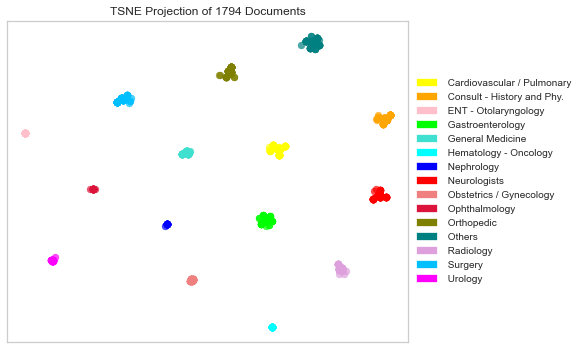

In [121]:
tsne = TSNEVisualizer(decompose_by=15, colors= ['yellow', 'orange', 'pink', 'lime', 'turquoise','aqua', 'blue', 'red', 'lightcoral', 'crimson', 'olive', 
                                               'teal', 'plum', 'deepskyblue', 'fuchsia' ])
tsne.fit(X_train_new, y_train_new)
tsne.show(outpath="plots/tsnedoc2vecTrain.png")

<AxesSubplot:title={'center':'TSNE Projection of 769 Documents'}>

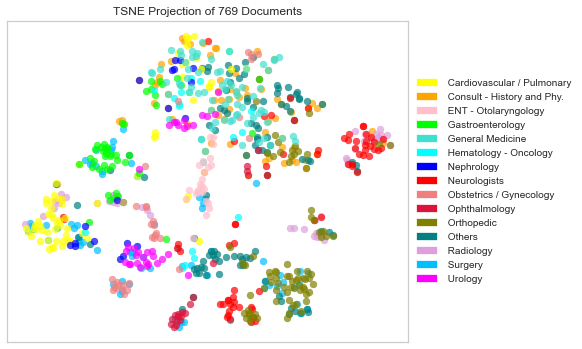

In [122]:
tsne = TSNEVisualizer(decompose_by=15, colors= ['yellow', 'orange', 'pink', 'lime', 'turquoise','aqua', 'blue', 'red', 'lightcoral', 'crimson', 'olive', 
                                               'teal', 'plum', 'deepskyblue', 'fuchsia' ])
tsne.fit(X_test_new, y_test_new)
tsne.show(outpath="plots/tsnedoc2vectest.png")

#  Examine Logistic Regression to Determine Parameters

In [123]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
# classifier

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

from pprint import pprint


# Look at parameters used by Random Forest
print('Parameters currently in use:\n')
pprint(classifier.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [124]:
# Create a base model with logistic regression
classifier.fit(X_train_new, y_train_new)

LogisticRegression()

In [125]:
print(f"Training Data Score: {classifier.score(X_train_new, y_train_new)}")
print(f"Testing Data Score: {classifier.score(X_test_new, y_test_new)}")

Training Data Score: 1.0
Testing Data Score: 0.32769830949284784


In [126]:
predictions = classifier.predict(X_test_new)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test_new[:10]}")

First 10 Predictions:   [' Gastroenterology' ' Others' ' Neurologists' ' Surgery'
 ' Cardiovascular / Pulmonary' ' Orthopedic' ' Neurologists' ' Orthopedic'
 ' Others' ' Cardiovascular / Pulmonary']
First 10 Actual labels: [' Surgery', ' Consult - History and Phy.', ' Consult - History and Phy.', ' Surgery', ' Radiology', ' Others', ' Neurologists', ' Surgery', ' Others', ' Cardiovascular / Pulmonary']


In [127]:
pd.DataFrame({"Prediction": predictions[:10], "Actual": y_test_new[:10]}).reset_index(drop=True)

,Prediction,Actual
0,Gastroenterology,Surgery
1,Others,Consult - History and Phy.
2,Neurologists,Consult - History and Phy.
3,Surgery,Surgery
4,Cardiovascular / Pulmonary,Radiology
5,Orthopedic,Others
6,Neurologists,Neurologists
7,Orthopedic,Surgery
8,Others,Others
9,Cardiovascular / Pulmonary,Cardiovascular / Pulmonary


# Random Search with Cross Validation

Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

The benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

In [128]:
from sklearn.model_selection import RandomizedSearchCV

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = [int(x) for x in np.linspace(start = 200, stop = 600, num = 10)]
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty, solver=solver)


pprint(hyperparameters)

{'C': [200, 244, 288, 333, 377, 422, 466, 511, 555, 600],
 'penalty': ['l1', 'l2'],
 'solver': ['liblinear', 'saga']}


In [129]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
lr_random = RandomizedSearchCV(classifier, hyperparameters, cv = 3, 
                            verbose=2, 
                            random_state=42, 
                            n_jobs= 1)

In [130]:
lr_random.fit(X_train_new, y_train_new);

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] solver=saga, penalty=l2, C=377 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... solver=saga, penalty=l2, C=377, total=   4.0s
[CV] solver=saga, penalty=l2, C=377 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] ................... solver=saga, penalty=l2, C=377, total=   3.6s
[CV] solver=saga, penalty=l2, C=377 ..................................
[CV] ................... solver=saga, penalty=l2, C=377, total=   3.3s
[CV] solver=liblinear, penalty=l1, C=377 .............................
[CV] .............. solver=liblinear, penalty=l1, C=377, total=   0.5s
[CV] solver=liblinear, penalty=l1, C=377 .............................
[CV] .............. solver=liblinear, penalty=l1, C=377, total=   0.6s
[CV] solver=liblinear, penalty=l1, C=377 .............................
[CV] .............. solver=liblinear, penalty=l1, C=377, total=   0.6s
[CV] solver=saga, penalty=l2, C=333 ..................................
[CV] ................... solver=saga, penalty=l2, C=333, total=   3.3s
[CV] solver=saga, penalty=l2, C=333 ..................................
[CV] ................... solver=saga, penalty=l2, C=333, total=   3.2s
[CV] solver=saga, penalty=l2, C=333 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.2min finished


# Evaluate the Best Random Search Model

In [131]:
best_random = lr_random.best_params_
best_random

{'solver': 'saga', 'penalty': 'l2', 'C': 377}

In [132]:
lr_random.score(X_test_new, y_test_new)

0.3511053315994798

In [133]:
print(f"Training Data Score: {lr_random.score(X_train_new, y_train_new)}")
print(f"Testing Data Score: {lr_random.score(X_test_new, y_test_new)}")

Training Data Score: 1.0
Testing Data Score: 0.3511053315994798


# Grid Search

We can now perform grid search building on the result from the random search. We will test a range of hyperparameters around the best values returned by random search.

In [134]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

param_grid = {'solver': ['saga'], 
              'penalty': ['l2'], 
              'C': [320, 330, 340, 350, 377, 380, 390, 400]}


In [135]:
classifier = LogisticRegression(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = 3, verbose=2, n_jobs= 1)

In [136]:
# Fit the grid search to the data
grid_search.fit(X_train_new, y_train_new);

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=320, penalty=l2, solver=saga ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=320, penalty=l2, solver=saga, total=   3.4s
[CV] C=320, penalty=l2, solver=saga ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV] ................... C=320, penalty=l2, solver=saga, total=   3.4s
[CV] C=320, penalty=l2, solver=saga ..................................
[CV] ................... C=320, penalty=l2, solver=saga, total=   3.3s
[CV] C=330, penalty=l2, solver=saga ..................................
[CV] ................... C=330, penalty=l2, solver=saga, total=   3.6s
[CV] C=330, penalty=l2, solver=saga ..................................
[CV] ................... C=330, penalty=l2, solver=saga, total=   3.4s
[CV] C=330, penalty=l2, solver=saga ..................................
[CV] ................... C=330, penalty=l2, solver=saga, total=   4.2s
[CV] C=340, penalty=l2, solver=saga ..................................
[CV] ................... C=340, penalty=l2, solver=saga, total=   4.5s
[CV] C=340, penalty=l2, solver=saga ..................................
[CV] ................... C=340, penalty=l2, solver=saga, total=   5.6s
[CV] C=340, penalty=l2, solver=saga ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.5min finished


In [137]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 320, 'penalty': 'l2', 'solver': 'saga'}
1.0


In [138]:
grid_search.score(X_test_new, y_test_new)

0.3342002600780234

In [139]:
print(f"Training Data Score: {grid_search.score(X_train_new, y_train_new)}")
print(f"Testing Data Score: {grid_search.score(X_test_new, y_test_new)}")

Training Data Score: 1.0
Testing Data Score: 0.3342002600780234


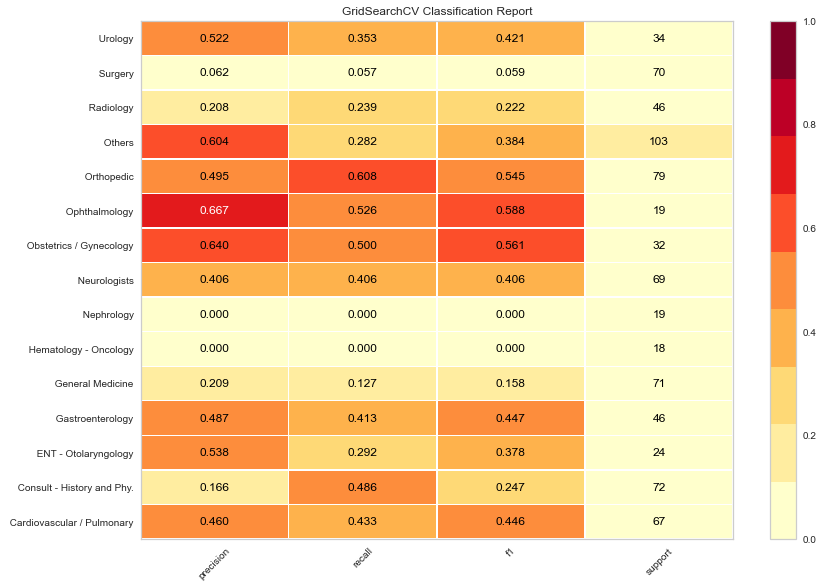

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [140]:
from yellowbrick.classifier import ClassificationReport

viz = ClassificationReport(grid_search,support=True,size=(900, 600))
viz.fit(X_train_new, y_train_new)
viz.score(X_test_new, y_test_new)
viz.show()